# FEATURE SELECTION FOR DETERMINING DIABETES RISK FACTORS (6 VARIATIONS)

## Research Work Implementation

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_selection import mutual_info_classif
import time
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import manifold, neighbors
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from timeit import default_timer as timer
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as metric
import warnings
from sklearn.model_selection import GridSearchCV
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### Check Quality of Data

In [2]:
d1 = pd.read_csv("d3.csv" , sep = "," , encoding = 'utf-8')

data = pd.read_csv('d3.csv')
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [4]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print("number of rows/entries:", num_rows )
print("number of columns", num_cols)

number of rows/entries: 253680
number of columns 22


In [5]:
duplicate = data[data.duplicated()].shape[0]
missing_entry = data.isnull().sum().sum()
print("Duplicate Overall Values are:", duplicate)
print("Missing Overall Values are:", missing_entry)

missing_entries = data.isnull().any()
print("Missing Values: \n",missing_entries)

Duplicate Overall Values are: 24206
Missing Overall Values are: 0
Missing Values: 
 Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool


#### Removing present duplicates

In [6]:
data = data.drop_duplicates()
# After deciding if rows with this value missing should be imputed or dropped
duplicate_after = data[data.duplicated()].shape[0]

In [7]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print("number of rows/entries:", num_rows )
print("number of columns", num_cols)
print("Duplicate Overall Values are:", duplicate_after)

number of rows/entries: 229474
number of columns 22
Duplicate Overall Values are: 0


In [8]:
def col_rename(data):
    data = data.rename(columns = {'Diabetes_binary': 'Diabetic', 'Diabetes_012': 'Diabetic'})
    return data

data = col_rename(data)

In [9]:
classifiers = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "DiffWalk",
    "Sex",
    "Age",
    "MentHlth",
    "PhysHlth",
    "BMI",
    'Education',
    'Income',
]

regressor = [
    "BMI",
]

## Checking for outliers

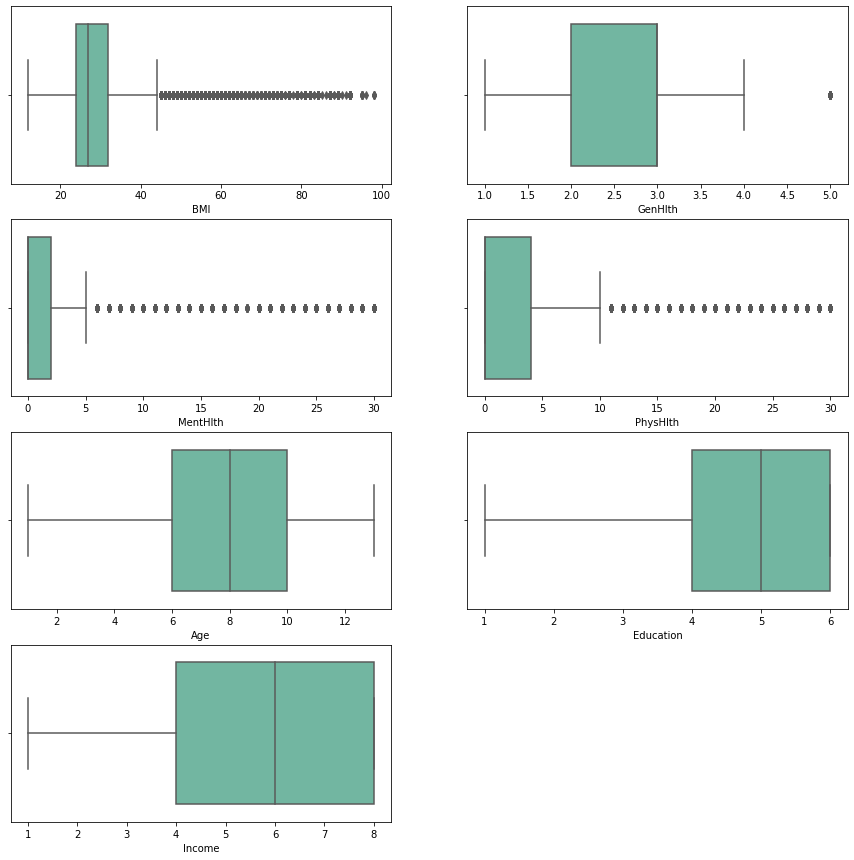

In [10]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

In [ ]:
## Removing Outliers

#### Ploting a histogram for correlation only for features
Here we are again going to create a mask as we created before and then arrange mask into a triangular shape and then create a data frame of correlation with the mask

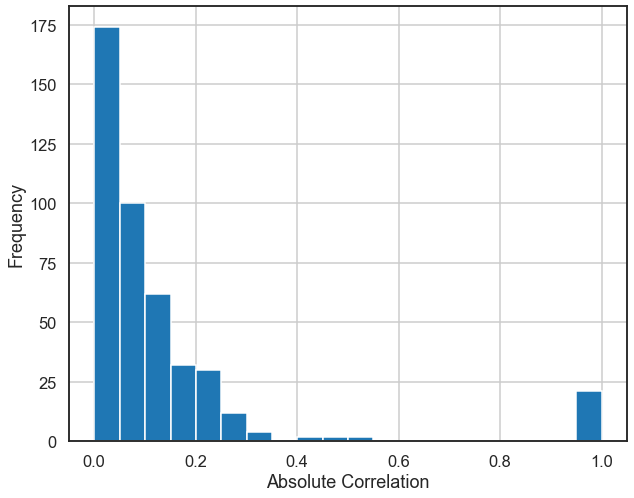

In [11]:
features_cols = data.columns[:-1]
corr_values = data[features_cols ].corr()
tril_index = np.tril_indices_from(corr_values)
corr_array = np.array(corr_values)
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns ,  index = corr_values.index)
corr_values = (corr_values
              .stack()
              .to_frame()
              .reset_index()
              .rename(columns={'level_0':'feature1',
                      'level_1':'feature2',
                      0:'correlation'}))
corr_values['abs_correlation'] = corr_values.correlation.abs()
sns.set_context('talk')
sns.set_style('white')
ax = corr_values.abs_correlation.hist(bins = 20 ,figsize=(10,8))
ax.set(xlabel='Absolute Correlation',ylabel='Frequency');

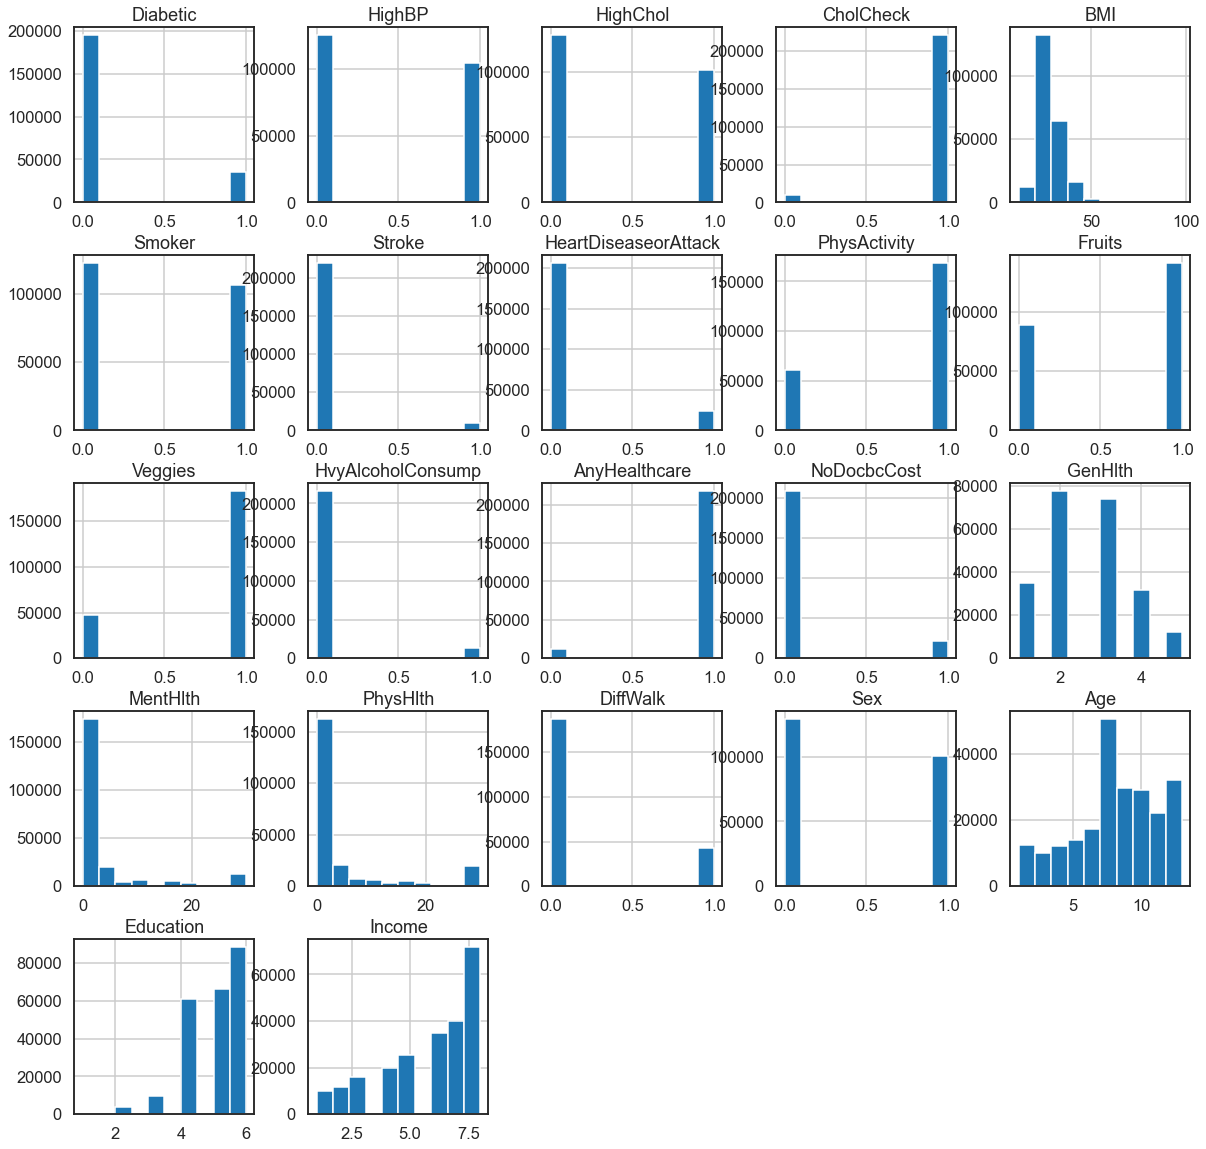

In [12]:
data.hist(figsize=(20,20));

#### Further description of the features 

1. Diabetic : 0 = no diabetes 1 = pre-diabetes or diabetes
2. HighBP : 0 = no high BP 1 = high BP
3. HighChol : 0 = no high cholesterol 1 = high cholesterol
4. CholCheck : 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
5. BMI : Body Mass Index
6. Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
7. Stroke : (Ever told) you had a stroke. 0 = no 1 = yes
8. HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
9. PhysActivity : physical activity in past 30 days - not including job 0 = no 1 = yes
10. Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes
11. Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes
12. HvyAlcoholConsump : (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
13. AnyHealthcare : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
14. NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
15. GenHlth : Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. MentHlth : days of poor mental health scale 1-30 days
17. PhysHlth : physical illness or injury days in past 30 days scale 1-30
18. DiffWalk : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
19. Sex : 0 = female 1 = male
20. Age : 13-level age category 1 = 18-24 0 = 60-64 13 = 80 or older

!!!!!!!!!!!!!Don't forget to drop the Income and education columns!!!!!!!!!!!!


In [128]:
detail = data.copy()
#I will use the detail dataframe to properly show the relation between features clearly
detail.Age[detail['Age'] == 1] = '18 to 24'
detail.Age[detail['Age'] == 2] = '25 to 29'
detail.Age[detail['Age'] == 3] = '30 to 34'
detail.Age[detail['Age'] == 4] = '35 to 39'
detail.Age[detail['Age'] == 5] = '40 to 44'
detail.Age[detail['Age'] == 6] = '45 to 49'
detail.Age[detail['Age'] == 7] = '50 to 54'
detail.Age[detail['Age'] == 8] = '55 to 59'
detail.Age[detail['Age'] == 9] = '60 to 64'
detail.Age[detail['Age'] == 10] = '65 to 69'
detail.Age[detail['Age'] == 11] = '70 to 74'
detail.Age[detail['Age'] == 12] = '75 to 79'
detail.Age[detail['Age'] == 13] = '80 or older'

detail.Diabetic[detail['Diabetic'] == 0] = 'No Diabetes'
detail.Diabetic[detail['Diabetic'] == 1] = 'Diabetes'

detail.HighBP[detail['HighBP'] == 0] = 'No High'
detail.HighBP[detail['HighBP'] == 1] = 'High BP'

detail.HighChol[detail['HighChol'] == 0] = 'No High Cholesterol'
detail.HighChol[detail['HighChol'] == 1] = 'High Cholesterol'

detail.CholCheck[detail['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
detail.CholCheck[detail['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

detail.Smoker[detail['Smoker'] == 0] = 'No'
detail.Smoker[detail['Smoker'] == 1] = 'Yes'

detail.Stroke[detail['Stroke'] == 0] = 'No'
detail.Stroke[detail['Stroke'] == 1] = 'Yes'

detail.HeartDiseaseorAttack[detail['HeartDiseaseorAttack'] == 0] = 'No'
detail.HeartDiseaseorAttack[detail['HeartDiseaseorAttack'] == 1] = 'Yes'

detail.PhysActivity[detail['PhysActivity'] == 0] = 'No'
detail.PhysActivity[detail['PhysActivity'] == 1] = 'Yes'

detail.Fruits[detail['Fruits'] == 0] = 'No'
detail.Fruits[detail['Fruits'] == 1] = 'Yes'

detail.Veggies[detail['Veggies'] == 0] = 'No'
detail.Veggies[detail['Veggies'] == 1] = 'Yes'

detail.HvyAlcoholConsump[detail['HvyAlcoholConsump'] == 0] = 'No'
detail.HvyAlcoholConsump[detail['HvyAlcoholConsump'] == 1] = 'Yes'

detail.AnyHealthcare[detail['AnyHealthcare'] == 0] = 'No'
detail.AnyHealthcare[detail['AnyHealthcare'] == 1] = 'Yes'

detail.NoDocbcCost[detail['Stroke'] == 0] = 'No'
detail.NoDocbcCost[detail['Stroke'] == 1] = 'Yes'

detail.GenHlth[detail['GenHlth'] == 5] = 'Excellent'
detail.GenHlth[detail['GenHlth'] == 4] = 'Very Good'
detail.GenHlth[detail['GenHlth'] == 3] = 'Good'
detail.GenHlth[detail['GenHlth'] == 2] = 'Fair'
detail.GenHlth[detail['GenHlth'] == 1] = 'Poor'

detail.DiffWalk[detail['DiffWalk'] == 0] = 'No'
detail.DiffWalk[detail['DiffWalk'] == 1] = 'Yes'

detail.Sex[detail['Sex'] == 0] = 'Female'
detail.Sex[detail['Sex'] == 1] = 'Male'

detail.Education[detail['Education'] == 1] = 'Never Attended School'
detail.Education[detail['Education'] == 2] = 'Elementary'
detail.Education[detail['Education'] == 3] = 'Primary School'
detail.Education[detail['Education'] == 4] = 'High School'
detail.Education[detail['Education'] == 5] = 'Undergraduate Degree'
detail.Education[detail['Education'] == 6] = 'Masters'

detail.Income[detail['Income'] == 1] = 'Less Than R10,000'
detail.Income[detail['Income'] == 2] = 'Less Than R10,000'
detail.Income[detail['Income'] == 3] = 'Less Than R10,000'
detail.Income[detail['Income'] == 4] = 'Less Than R10,000'
detail.Income[detail['Income'] == 5] = 'Less Than R35,000'
detail.Income[detail['Income'] == 6] = 'Less Than R35,000'
detail.Income[detail['Income'] == 7] = 'Less Than R35,000'
detail.Income[detail['Income'] == 8] = 'R75,000 or More'

warnings.filterwarnings("ignore")

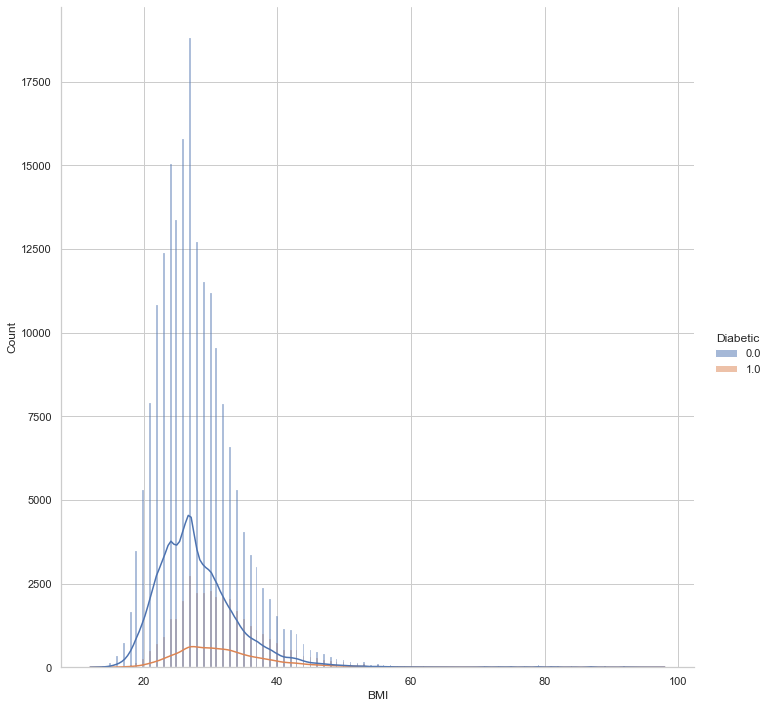

In [14]:
for feature in regressor:
    sns.set(style="whitegrid", color_codes=True)
    sns.displot(data=data, x=feature, kde=True, hue="Diabetic", height=10)
    plt.show()

!!!!!!after on top, Explain the meaning of the ranges of those BMI readings!!!!!

#### Checking the relationship between diabetic patients and BMI

The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.

The BMI calculation divides an adult's weight in kilograms by their height in metres squared. For example, A BMI of 25 means 25kg/m2.

#### BMI ranges
For most adults, an ideal BMI is in the 18.5 to 24.9 range.

For children and young people aged 2 to 18, the BMI calculation takes into account age and gender as well as height and weight.

If your BMI is:

   - below 18.5 – you're in the underweight range
   - between 18.5 and 24.9 – you're in the healthy weight range
   - between 25 and 29.9 – you're in the overweight range
   - between 30 and 39.9 – you're in the obese range


#### Accuracy of BMI
BMI provides a healthy weight range for a given height by accounting for natural variations in body form.

When determining if you have a healthy weight, healthcare practitioners may consider additional criteria in addition to your BMI.

Heavyweight boxers, weightlifters, and athletes may be incredibly muscular and still be at a healthy weight even though their BMI is considered to be obese since muscle is much denser than fat.

Your chance of developing some diseases might also be influenced by your ethnicity. For instance, South Asian adults with a BMI of 23, which is typically seen as healthy, may be more susceptible to certain health issues, such diabetes.

In [112]:
diabetic_patients1 = data[(data["Diabetic"]==1)]["Diabetic"].value_counts()
BMI_count1 = data[(data["Diabetic"]==1) & (data["BMI"]<18.5)]["Diabetic"].value_counts()

print(diabetic_patients1)
print(BMI_count1)

1.0    35097
Name: Diabetic, dtype: int64
1.0    169
Name: Diabetic, dtype: int64


In [113]:
diabetic_patients2 = data[(data["Diabetic"]==1)]["Diabetic"].value_counts()
BMI_count2 = data[(data["Diabetic"]==1) & (data["BMI"]>=18.5) & ((data["BMI"]<24.9))]["Diabetic"].value_counts()

print(diabetic_patients2)
print(BMI_count2)

1.0    35097
Name: Diabetic, dtype: int64
1.0    3910
Name: Diabetic, dtype: int64


In [114]:
diabetic_patients3 = data[(data["Diabetic"]==1)]["Diabetic"].value_counts()
BMI_count3 = data[(data["Diabetic"]==1) & (data["BMI"]>=24.9)]["Diabetic"].value_counts()

print(diabetic_patients3)
print(BMI_count3)

1.0    35097
Name: Diabetic, dtype: int64
1.0    31018
Name: Diabetic, dtype: int64


#### Checking the relationship between Not-diabetic patients and BMI

In [115]:
diabetic_patients4 = data[(data["Diabetic"]==0)]["Diabetic"].value_counts()
BMI_count4 = data[(data["Diabetic"]==0) & (data["BMI"]<18.5)]["Diabetic"].value_counts()

print(diabetic_patients4)
print(BMI_count4)

0.0    194377
Name: Diabetic, dtype: int64
0.0    2883
Name: Diabetic, dtype: int64


In [116]:
diabetic_patients5 = data[(data["Diabetic"]==0)]["Diabetic"].value_counts()
BMI_count5 = data[(data["Diabetic"]==0) & (data["BMI"]>=18.5) & ((data["BMI"]<24.9))]["Diabetic"].value_counts()

print(diabetic_patients5)
print(BMI_count5)

0.0    194377
Name: Diabetic, dtype: int64
0.0    54932
Name: Diabetic, dtype: int64


In [117]:
diabetic_patients6 = data[(data["Diabetic"]==0)]["Diabetic"].value_counts()
BMI_count6 = data[(data["Diabetic"]==0) & (data["BMI"]>=24.9)]["Diabetic"].value_counts()

print(diabetic_patients6)
print(BMI_count6)

0.0    194377
Name: Diabetic, dtype: int64
0.0    136562
Name: Diabetic, dtype: int64


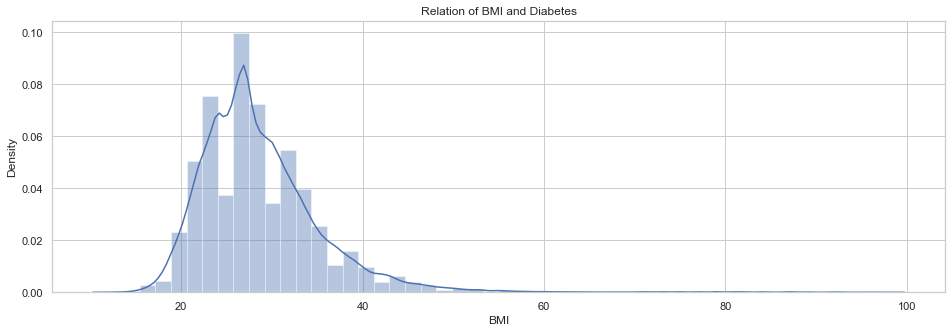

In [118]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
#plt.plot(1,2,2)
plt.title("Relation of BMI and Diabetes")
sns.distplot(data['BMI'])
plt.show()


#### Checking the relationship between diabetic patients and HighBP

High blood pressure, also called hypertension, is blood pressure that is higher than normal. Your blood pressure changes throughout the day based on your activities. Having blood pressure measures consistently above normal may result in a diagnosis of high blood pressure (or hypertension).

The higher your blood pressure levels, the more risk you have for other health problems, such as heart disease, diabetes, heart attack, and stroke.

A health care team can diagnose high blood pressure and make treatment decisions by reviewing a patient's systolic and diastolic blood pressure levels and comparing them to levels found in certain guidelines.

The guidelines used to diagnose high blood pressure may differ from health care professional to health care professional:

   - Some health care professionals diagnose patients with high blood pressure if their blood pressure is consistently 140/90 mm Hg or higher.2 This limit is based on a guideline released in 2003.
   - Other health care professionals diagnose patients with high blood pressure if their blood pressure is consistently 130/80 mm Hg or higher.
   
High blood pressure(hypertension) can lead to many complications of diabetes, including diabetic eye disease and kidney disease, or make them worse. Most people with diabetes will eventually have high blood pressure, along with other heart and circulation problems.


1.0    26405
Name: Diabetic, dtype: int64
1.0    8692
Name: Diabetic, dtype: int64


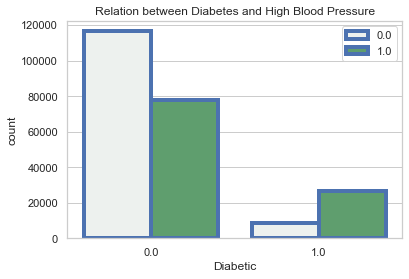

In [119]:
sns.countplot(x="Diabetic", data=data,hue="HighBP",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and High Blood Pressure")
plt.legend();


Bp1 = data[(data["Diabetic"]==1) & (data["HighBP"]==1)]["Diabetic"].value_counts()
Bp2 = data[(data["Diabetic"]==1) & (data["HighBP"]==0)]["Diabetic"].value_counts()

print(Bp1)
print(Bp2)

#### Checking the relationship between diabetic patients and HighChol

If you have type 2 diabetes, you might have high cholesterol levels, too. With type 2 diabetes, your body doesn’t regulate or use glucose (sugar) the way it should. That can lead to too-high levels of glucose in your blood.

High glucose levels can contribute to other health conditions, including high cholesterol. But even people with type 2 diabetes who have well-controlled blood sugar may have cholesterol problems.

If you have type 2 diabetes and have your blood sugar under control, you still might have high levels of triglycerides and low HDL levels. You may also have higher levels of LDL cholesterol, too. Having poor blood sugar control can make cholesterol levels worse.

If you have diabetes and have low levels of good cholesterol but high levels of bad cholesterol and high triglycerides, you have a condition called diabetic dyslipidemia. Up to 70% of people with type 2 diabetes have diabetic dyslipidemia.

One reason diabetes is linked with heart disease is because people with diabetes tend to have LDL particles that are smaller and denser than those who don’t. This gives it more of a chance to invade blood vessel walls and create plaque in your arteries.

People with type 1 diabetes who have their blood sugar under control usually have normal levels of cholesterol. If they’re overweight or have obesity, though, they’re more likely to have high cholesterol. 

1.0    23496
Name: Diabetic, dtype: int64
1.0    11601
Name: Diabetic, dtype: int64


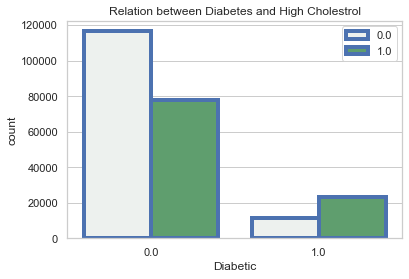

In [23]:
sns.countplot(x="Diabetic", data=data,hue="HighChol",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and High Cholestrol")
plt.legend();


ch1 = data[(data["Diabetic"]==1) & (data["HighChol"]==1)]["Diabetic"].value_counts()
ch2 = data[(data["Diabetic"]==1) & (data["HighChol"]==0)]["Diabetic"].value_counts()

print(ch1)
print(ch2)

#### Checking the relationship between diabetic patients and Smoking

Smoking is one cause of type 2 diabetes.2 In fact, people who smoke cigarettes are 30%–40% more likely to develop type 2 diabetes than people who don’t smoke. People with diabetes who smoke are more likely than those who don’t smoke to have trouble with insulin dosing and with managing their condition. The more cigarettes you smoke, the higher your risk for type 2 diabetes.

No matter what type of diabetes you have, smoking makes your diabetes harder to manage. If you have diabetes and you smoke, you are more likely to have serious health problems from diabetes, including:3

   - Heart disease
   - Kidney disease
   - Poor blood flow in the legs and feet that can lead to infections, ulcers, and possible amputation (removal of a body part by surgery, such as toes or feet)
   - Retinopathy (an eye disease that can cause blindness)
   - Peripheral neuropathy (damaged nerves to the arms and legs that cause numbness, pain, weakness, and poor coordination)


1.0    18223
Name: Diabetic, dtype: int64
1.0    16874
Name: Diabetic, dtype: int64


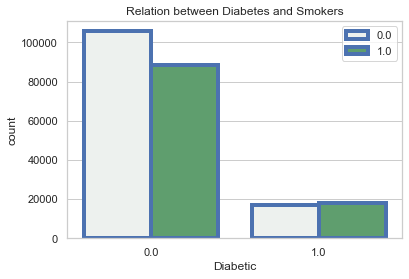

In [24]:
sns.countplot(x="Diabetic", data=data,hue="Smoker",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Smokers")
plt.legend();

sm1 = data[(data["Diabetic"]==1) & (data["Smoker"]==1)]["Diabetic"].value_counts()
sm2 = data[(data["Diabetic"]==1) & (data["Smoker"]==0)]["Diabetic"].value_counts()

print(sm1)
print(sm2)

#### Checking the relationship between diabetic patients and Heavy Alcohol consumption

- Chronic use of alcohol is considered to be a potential risk factor for the incidence of type 2 diabetes mellitus (T2DM), which causes insulin resistance and pancreatic β-cell dysfunction that is a prerequisite for the development of diabetes. However, alcohol consumption in diabetes has been controversial and more detailed information on the diabetogenic impact of alcohol seems warranted. Diabetes, especially T2DM, causes dysregulation of various metabolic processes, which includes a defect in the insulin-mediated glucose function of adipocytes, and an impaired insulin action in the liver. In addition, neurobiological profiles of alcoholism are linked to the effects of a disruption of glucose homeostasis and of insulin resistance, which are affected by altered appetite that regulates the peptides and neurotrophic factors. Since conditions, which precede the onset of diabetes that are associated with alcoholism is one of the crucial public problems, researches in efforts to prevent and treat diabetes with alcohol dependence, receives special clinical interest.


1.0    832
Name: Diabetic, dtype: int64
1.0    34265
Name: Diabetic, dtype: int64


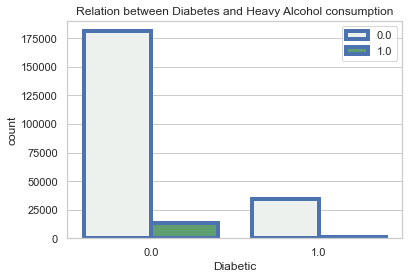

In [25]:
sns.countplot(x="Diabetic", data=data,hue="HvyAlcoholConsump",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Heavy Alcohol consumption")
plt.legend();

al1 = data[(data["Diabetic"]==1) & (data["HvyAlcoholConsump"]==1)]["Diabetic"].value_counts()
al2 = data[(data["Diabetic"]==1) & (data["HvyAlcoholConsump"]==0)]["Diabetic"].value_counts()

print(al1)
print(al2)

#### Checking the relationship between diabetic patients and Heart Disease or Attack

- Heart disease is common in people with diabetes. Data from the National Heart Association from 2012 shows 65% of people with diabetes will die from some sort of heart disease or stroke. In general, the risk of heart disease death and stroke are more than twice as high in people with diabetes.

- While all people with diabetes have an increased chance of developing heart disease, the condition is more common in those with type 2 diabetes. In fact, heart disease is the number one cause of death among people with type 2 diabetes



1.0    7856
Name: Diabetic, dtype: int64
1.0    27241
Name: Diabetic, dtype: int64


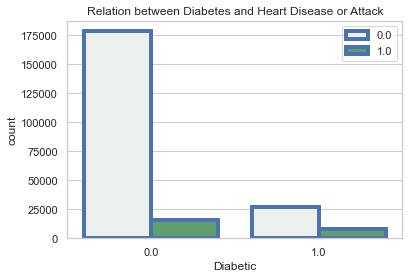

In [26]:
sns.countplot(x="Diabetic", data=data,hue="HeartDiseaseorAttack",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Heart Disease or Attack")
plt.legend();

ha1 = data[(data["Diabetic"]==1) & (data["HeartDiseaseorAttack"]==1)]["Diabetic"].value_counts()
ha2 = data[(data["Diabetic"]==1) & (data["HeartDiseaseorAttack"]==0)]["Diabetic"].value_counts()

print(ha1)
print(ha2)

#### Checking the relationship between diabetic patients and physical Activity

- Physical activity improves glycemic control and reduces the risk of cardiovascular disease and mortality in patients with type 2 diabetes (T2D). Moderate to vigorous physical activity is recommended to manage T2D; however, patients with T2D can be physically weak, making it difficult to engage in the recommended levels of physical activity. Daily physical activity includes various activities performed during both occupational and leisure time such as walking, gardening, and housework that type 2 diabetic patients should be able to perform without considerable physical burden. This review focuses on the association between daily physical activity and T2D. Walking was the most common form of daily physical activity, with numerous studies demonstrating its beneficial effects on reducing the risk of T2D,cardiovascular disease, and mortality. 


1.0    22059
Name: Diabetic, dtype: int64
1.0    13038
Name: Diabetic, dtype: int64


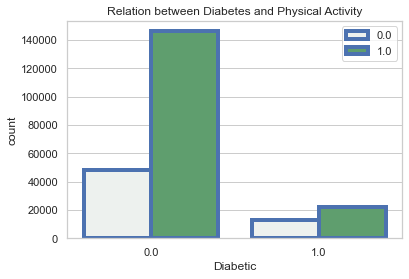

In [27]:
sns.countplot(x="Diabetic", data=data,hue="PhysActivity",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Physical Activity")
plt.legend();

ph1 = data[(data["Diabetic"]==1) & (data["PhysActivity"]==1)]["Diabetic"].value_counts()
ph2 = data[(data["Diabetic"]==1) & (data["PhysActivity"]==0)]["Diabetic"].value_counts()

print(ph1)
print(ph2)

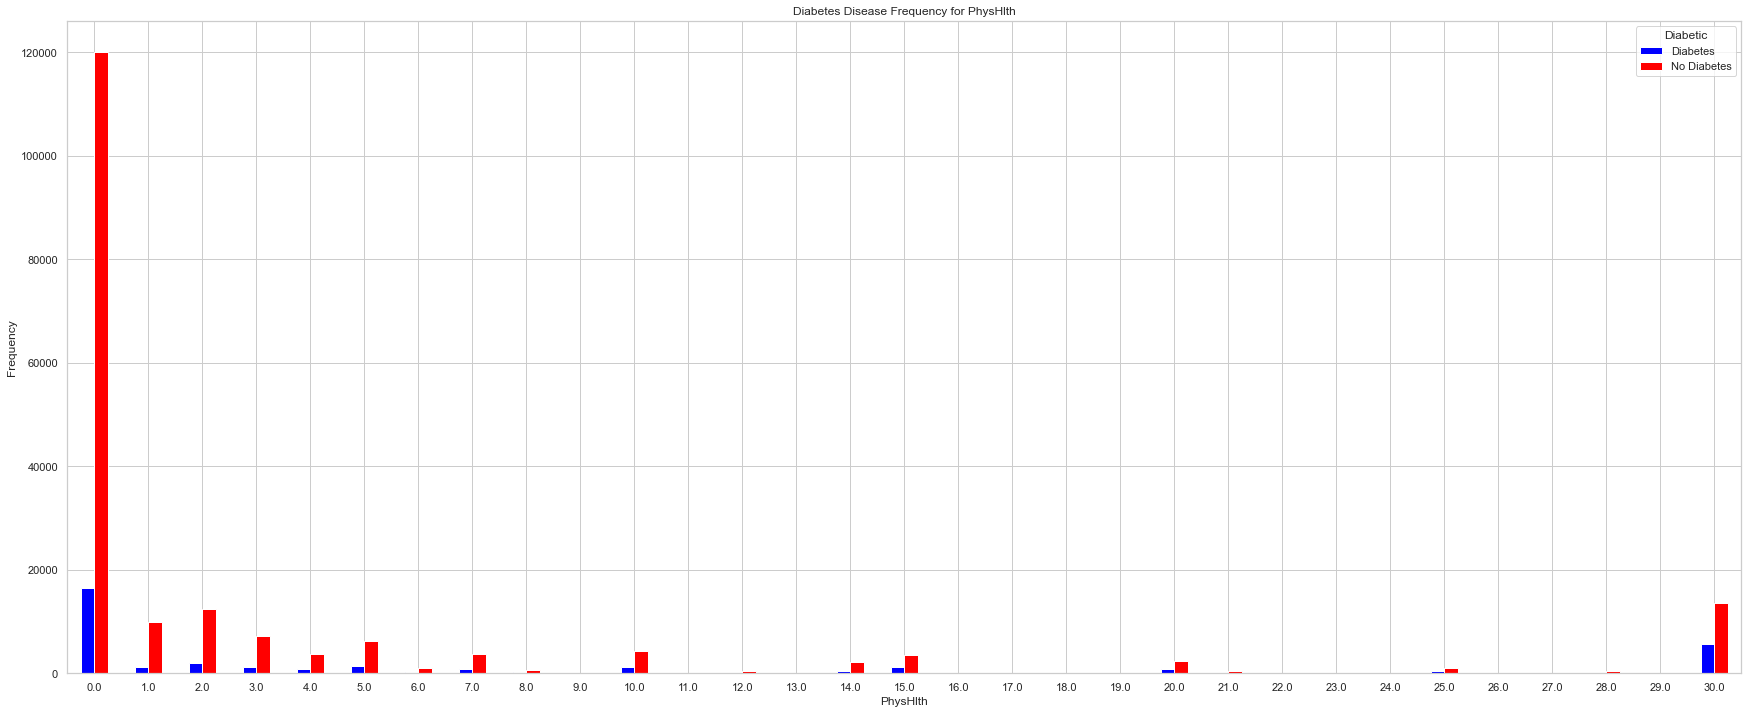

In [28]:
pd.crosstab(detail.PhysHlth,detail.Diabetic).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### Checking the relationship between diabetic patients and Vegetables intake

- The increase in the incidence of type 2 diabetes has been attributed in part to high-fat, high calorie diets, overweight and obesity – particularly excess abdominal fat, and lack of exercise(1,2). These factors are associated with insulin resistance and metabolic syndrome- important risk factors for type 2 diabetes and cardiovascular disease(3). Estimates suggest that up to a 75% reduction in risk for type 2 diabetes could be achieved by preventing obesity(4).

- Observations from population-based studies suggest that fruit and vegetable consumption may be associated with a reduced risk of diabetes(5-8) or may be protective(9), although results have not always been consistent(10-12). A positive association between fruits and vegetables and reduced risk is supported by an inverse association between serum carotenoids, a marker for fruit and vegetable intake, and type 2 diabetes and impaired glucose metabolism in adults(13).

- Dietary patterns that include fruits and vegetables have been associated with a reduction in fasting blood glucose(14-16), improved results on glucose tolerance tests(17,18) lower glycosylated hemoglobin values(19) and enhanced insulin sensitivity(20). However, energy intake may modify these associations(21). Taken together, these studies suggest that fruit and vegetable intake is potentially beneficial for prevention and management of diabetes.


1.0    26495
Name: Diabetic, dtype: int64
1.0    8602
Name: Diabetic, dtype: int64


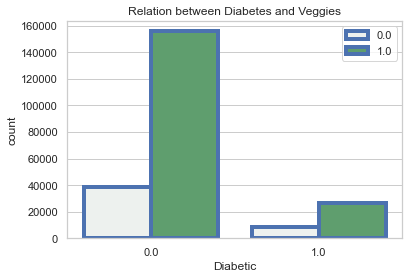

In [29]:
sns.countplot(x="Diabetic", data=data,hue="Veggies",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Veggies")
plt.legend();

v1 = data[(data["Diabetic"]==1) & (data["Veggies"]==1)]["Diabetic"].value_counts()
v2 = data[(data["Diabetic"]==1) & (data["Veggies"]==0)]["Diabetic"].value_counts()

print(v1)
print(v2)

#### Checking the relationship between diabetic patients and Fruits intake

- Overwhelming evidence supports the promotion of a healthy diet and regular physical activity for mitigating the risk of T2DM. In particular, an inverse association between fruit intake and T2DM incidence has been reported in a pooled analysis of 3 large observational studies. Further, adherence to Australian Dietary Guidelines recommendations for fruit consumption (2 servings [150 g] per day for adults) was associated with a 32% lower risk of T2DM over 12 years in the Australian Diabetes, Obesity and Lifestyle Study. The authors report that adherence to these recommendations could have prevented 23% of T2DM cases (population attributable fraction: 23.3 [7.3-38.2]). However, it is likely that not all fruits offer equal protection against diabetes as heterogeneity in the associations between individual fruit consumption and risk of T2DM has been reported. Specifically, in 3 prospective cohorts of American men and women, a higher consumption of blueberries, grapes, apples, bananas, and grapefruit were individually associated with a significantly lower risk of T2DM. Interestingly, variances in glycemic index and glycemic load did not explain the differential association of specific fruits with risk of T2DM.


1.0    20505
Name: Diabetic, dtype: int64
1.0    14592
Name: Diabetic, dtype: int64


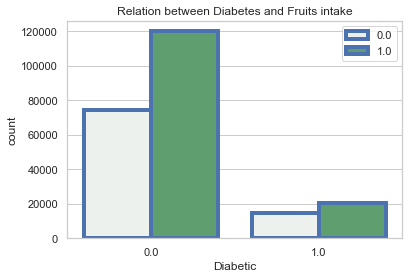

In [30]:
sns.countplot(x="Diabetic", data=data,hue="Fruits",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Fruits intake")
plt.legend();

f1 = data[(data["Diabetic"]==1) & (data["Fruits"]==1)]["Diabetic"].value_counts()
f2 = data[(data["Diabetic"]==1) & (data["Fruits"]==0)]["Diabetic"].value_counts()

print(f1)
print(f2)

#### Checking the relationship between diabetic patients and Age

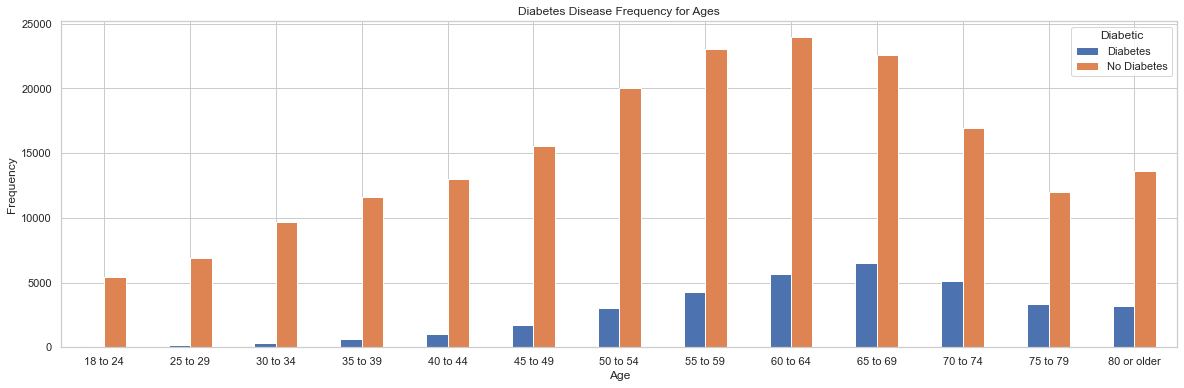

In [31]:
pd.crosstab(detail.Age,detail.Diabetic).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

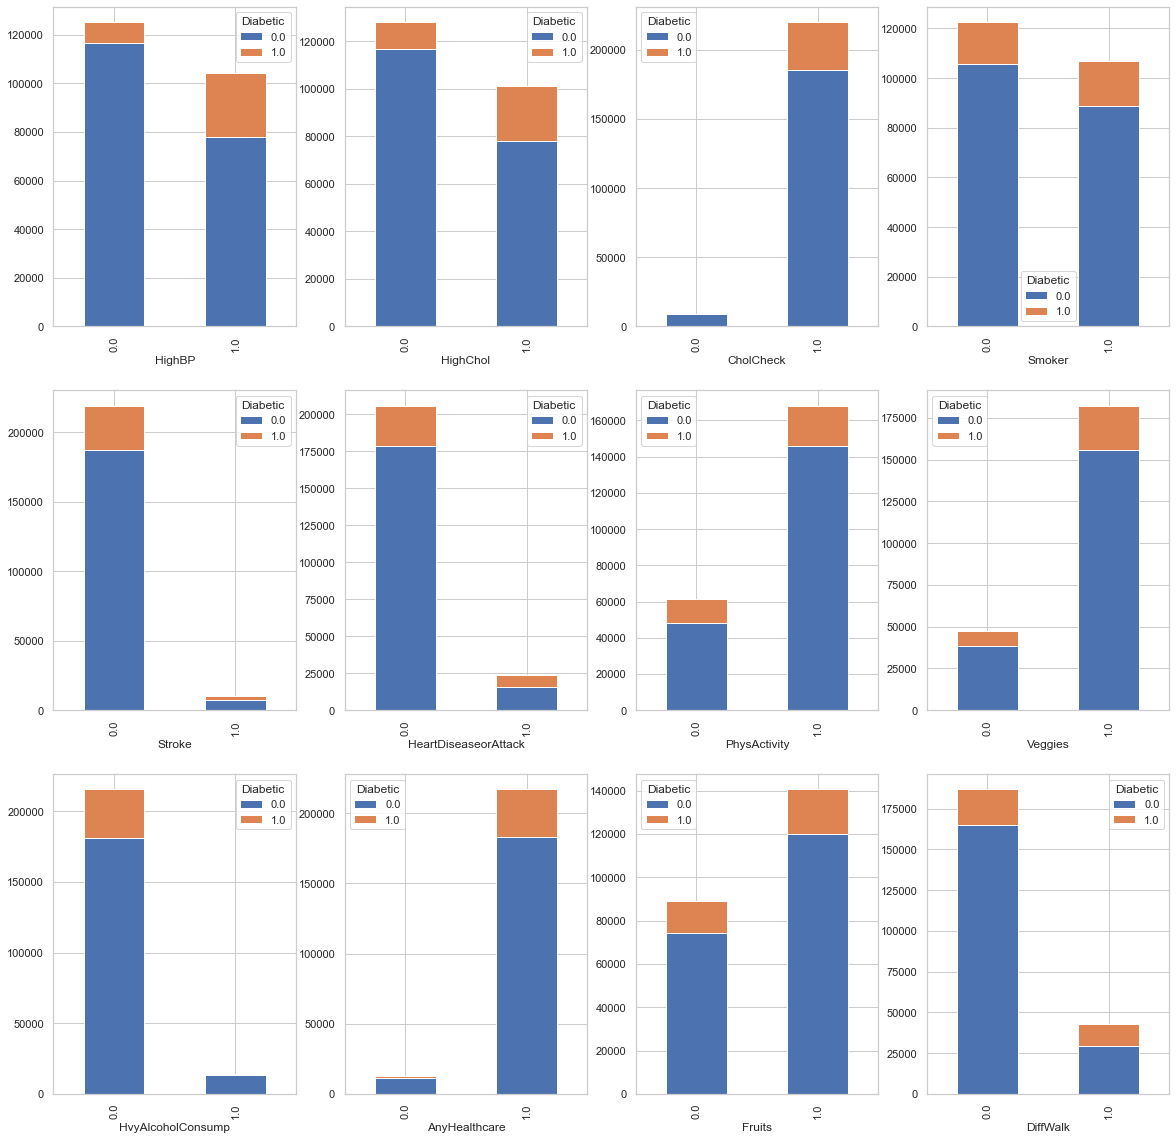

In [32]:
#Broader relation view to the features and the target

cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'Fruits', 'DiffWalk']
def create_plot_pivot(data, x_column):
    #Create a pivot table for satisfaction versus another rating for easy plotting.
    _df_plot = data.groupby([x_column, 'Diabetic']).size() \
    .reset_index().pivot(columns='Diabetic', index=x_column, values=0)
    return _df_plot

fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

#### Visualizing the percentage of Diabetic patients to Non-diabetic patients

In [33]:
data["Diabetic"].value_counts()

0.0    194377
1.0     35097
Name: Diabetic, dtype: int64

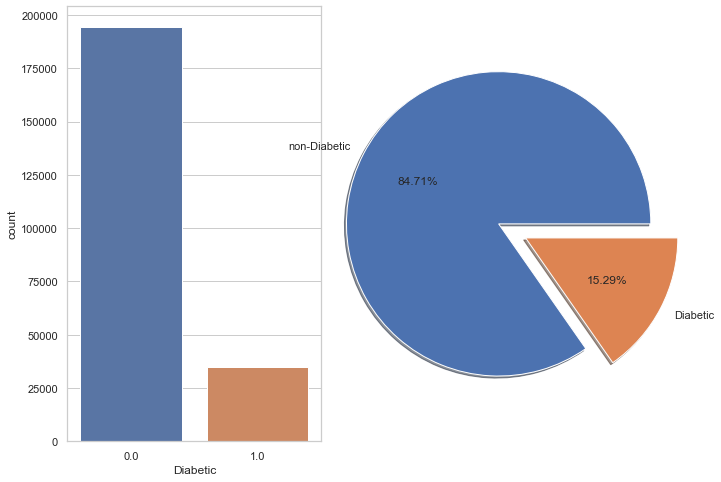

In [34]:
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(data['Diabetic'],ax=plot1[0])



labels=["non-Diabetic","Diabetic"]

plt.pie(data["Diabetic"].value_counts() , labels = labels,autopct="%.2f%%",shadow=True,explode=(0,0.3),radius=1.5);


In [38]:
!pip install -U imbalanced-learn

In [39]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\phiez\Anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39hcbf5309_2         985 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         985 KB

The following packages will be UPDATED:

  conda                               22.9.0-py39hcbf5309_1 --> 22.9.0-py39hcbf5309_2 None




conda-22.9.0         | 985 KB    |            |   0% 
conda-22.9.0         | 985 KB    | ####       |  41% 
conda-22.9.0         | 985 KB    | ########## | 100% 
conda-22.9.0         | 985 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrievi

### Dealing with Imbalancing

Class=0, n=194377 (50.000%)
Class=1, n=194377 (50.000%)


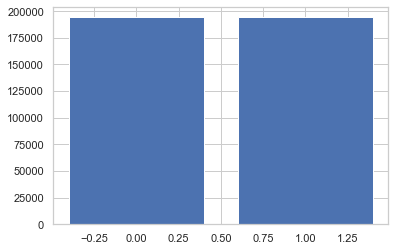

In [40]:
target=data['Diabetic']
independent=data.drop('Diabetic',axis=1)

from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from matplotlib import pyplot
oversample = SMOTE()
independent, target = oversample.fit_resample(independent, target)
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [41]:
independent.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [42]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetic, dtype: float64

In [43]:
independent.shape, target.shape

((388754, 21), (388754,))

In [44]:
!Pip install sklearn

In [45]:
from sklearn.model_selection import train_test_split
X_train, x_, y_train, y_ = train_test_split(independent, target, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_ = scaler.transform(x_)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 75% training and 25% test

In [46]:
def confusion_metrics(conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

## Correlation Testing:
Correlation test matrix is used to evaluate the association between two or more variables.
- The correlation matrix makes the absence or presence of a relationship between two variables clear. This makes it more relevant.
- The correlation matrix helps to predict the evolution of the relationship between the variables.
- The correlation matrix allows you to have a global view of the more or less strong relationship between several variables.
- It’s always easier to understand the data when it’s presented in a visual way

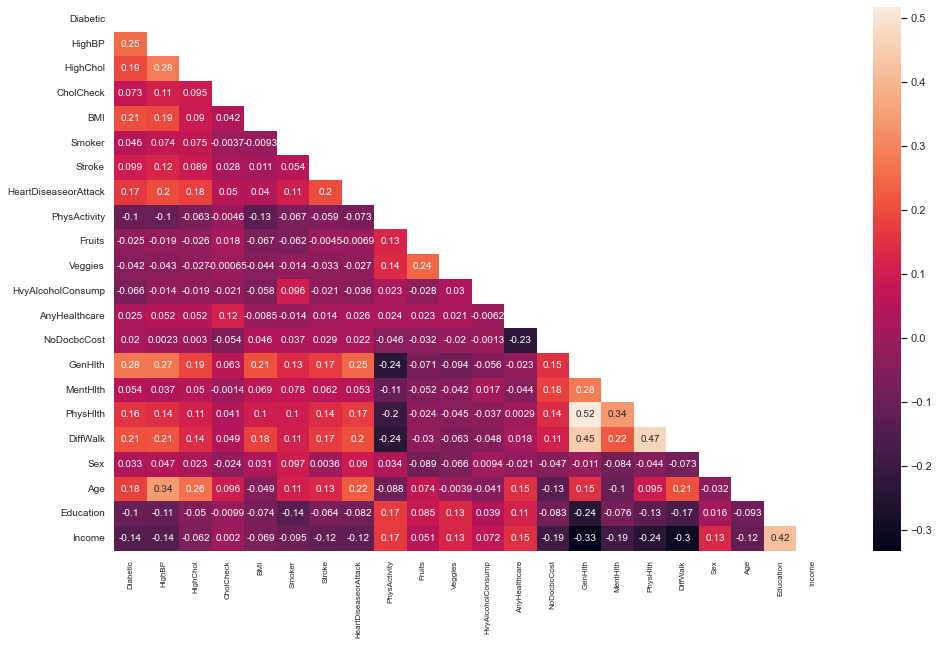

In [121]:
mask = np.zeros_like(data.corr()) 
triangle_indeces=np.triu_indices_from(mask)
mask[triangle_indeces] =True
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":10})
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

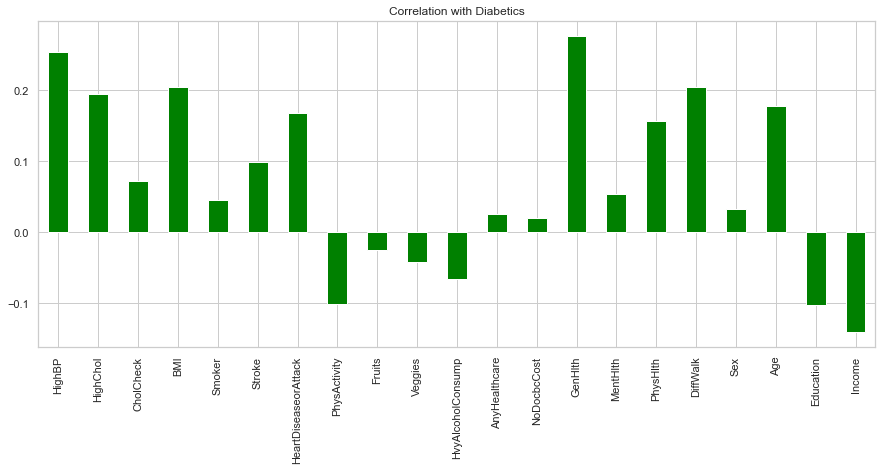

In [122]:
data.drop('Diabetic', axis=1).corrwith(data.Diabetic).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetics",color="green");

### Implement Forward Selection

In [47]:
!pip install mlxtend

#### importing the models

In [125]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

lr = LogisticRegression()

no_features = [3,5,7,10]
for i in range(len(no_features)):
    fs1 = sfs(lr, k_features=no_features[i], forward=True, verbose=1, scoring='accuracy', cv=5)
    startf = timer()
    fs1 = fs1.fit(X_train, y_train)
    endf = timer()
    t_timef = endf-startf
    trained_f = list(fs1.k_feature_names_)
    score = fs1.k_score_
    k_features = fs1.k_feature_idx_
    data.columns[1:][list(k_features)]
    X_train_sele = fs1.transform(X_train)
    X_test_sele = fs1.transform(x_)
    print(f'Top {no_features[i]} Features in Forward Selection')
    print(f"Training duration: {t_timef}")
    print("Selected features:", trained_f)
    print(f'prediction score for these {no_features[i]} features:',score)
    print("---------------------------------------------------------------------------------------------------")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   11.1s finished
Features: 1/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.5s finished
Features: 2/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   15.1s finished
Features: 3/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Top 3 Features in Forward Selection
Training duration: 39.00499719999971
Selected features: ['HighBP', 'CholCheck', 'GenHlth']
prediction score for these 3 features: 0.7256495121156518
---------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   11.0s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.6s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   15.3s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   20.9s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   22.1s finished
Features: 5/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Top 5 Features in Forward Selection
Training duration: 82.49876129999939
Selected features: ['HighBP', 'CholCheck', 'Stroke', 'Veggies', 'GenHlth']
prediction score for these 5 features: 0.7248915336202905
---------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   10.9s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.7s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   15.1s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   20.8s finished
Features: 4/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   21.9s finished
Features: 5/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   25.2s finished
Features: 6/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

Top 7 Features in Forward Selection
Training duration: 135.96543329999986
Selected features: ['HighBP', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'GenHlth']
prediction score for these 7 features: 0.7243907876459794
---------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   11.2s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.7s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   15.1s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   20.7s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   21.7s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   25.1s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

Top 10 Features in Forward Selection
Training duration: 236.2843612000015
Selected features: ['HighBP', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth']
prediction score for these 10 features: 0.7248915336202905
---------------------------------------------------------------------------------------------------


In [49]:
metric_dict = fs1.get_metric_dict(confidence_interval=0.95)
metric_dict

{1: {'feature_idx': (0,),
  'cv_scores': array([0.67713889, 0.6768988 , 0.6792139 , 0.67427503, 0.67410354]),
  'avg_score': 0.6763260336460137,
  'feature_names': ('HighBP',),
  'ci_bound': 0.0024706098341136084,
  'std_dev': 0.0019222183856766166,
  'std_err': 0.0009611091928383083},
 2: {'feature_idx': (0, 13),
  'cv_scores': array([0.72301202, 0.72249756, 0.72381802, 0.72246326, 0.71927358]),
  'avg_score': 0.7222128856344211,
  'feature_names': ('HighBP', 'GenHlth'),
  'ci_bound': 0.0019910257440177493,
  'std_dev': 0.0015490856705342468,
  'std_err': 0.0007745428352671233},
 3: {'feature_idx': (0, 2, 13),
  'cv_scores': array([0.72640749, 0.72599592, 0.72755646, 0.72537856, 0.72290913]),
  'avg_score': 0.7256495121156518,
  'feature_names': ('HighBP', 'CholCheck', 'GenHlth'),
  'ci_bound': 0.0019840251898655577,
  'std_dev': 0.001543639001572008,
  'std_err': 0.000771819500786004},
 4: {'feature_idx': (0, 2, 9, 13),
  'cv_scores': array([0.72645894, 0.72606451, 0.72762506, 0.7252

In [50]:
df = pd.DataFrame.from_dict(metric_dict).T
df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.6771388884125323, 0.6768988047262189, 0.679...",0.676326,"(HighBP,)",0.002471,0.001922,0.000961
2,"(0, 13)","[0.7230120213331505, 0.7224975562910501, 0.723...",0.722213,"(HighBP, GenHlth)",0.001991,0.001549,0.000775
3,"(0, 2, 13)","[0.726407490611013, 0.7259959185773327, 0.7275...",0.72565,"(HighBP, CholCheck, GenHlth)",0.001984,0.001544,0.000772
4,"(0, 2, 9, 13)","[0.726458937115223, 0.7260645139162794, 0.7276...",0.725704,"(HighBP, CholCheck, Veggies, GenHlth)",0.001938,0.001508,0.000754
5,"(0, 2, 5, 9, 13)","[0.7253614116920756, 0.7254643047004956, 0.726...",0.724892,"(HighBP, CholCheck, Stroke, Veggies, GenHlth)",0.001945,0.001514,0.000757
6,"(0, 2, 5, 8, 9, 13)","[0.7253785605268122, 0.7254471558657589, 0.726...",0.724854,"(HighBP, CholCheck, Stroke, Fruits, Veggies, G...",0.001941,0.00151,0.000755
7,"(0, 2, 5, 6, 8, 9, 13)","[0.725550048874179, 0.7243839281120847, 0.7261...",0.724391,"(HighBP, CholCheck, Stroke, HeartDiseaseorAtta...",0.001816,0.001413,0.000706
8,"(0, 2, 5, 6, 8, 9, 11, 13)","[0.7260130674120694, 0.7248297978152385, 0.726...",0.724638,"(HighBP, CholCheck, Stroke, HeartDiseaseorAtta...",0.002091,0.001627,0.000813
9,"(0, 2, 5, 6, 8, 9, 11, 12, 13)","[0.7262360022636462, 0.7250355838320786, 0.727...",0.724981,"(HighBP, CholCheck, Stroke, HeartDiseaseorAtta...",0.002615,0.002034,0.001017
10,"(0, 2, 4, 5, 6, 8, 9, 11, 12, 13)","[0.725601495378389, 0.7250355838320786, 0.7276...",0.724892,"(HighBP, CholCheck, Smoker, Stroke, HeartDisea...",0.002539,0.001975,0.000988


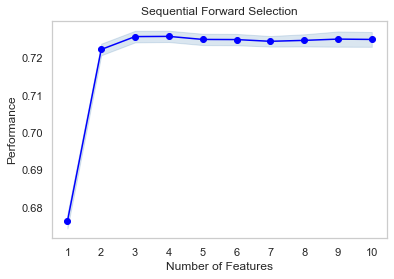

In [51]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [ ]:
"HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "DiffWalk",
    "Sex",
    "Age",
    "MentHlth",
    "PhysHlth",
    "BMI",
    'Education',
    'Income',

#### Feature Selection with Correlation and Sequential Forward Selection

**1. Selecting Top 3 features**
    -According to the heat map we created above and the selection made by the forward selection, we can infer the following:
    -The features 'HighBP', 'CholCheck' and 'GenHlth' are highly correlated with each other, so we will use only them for the Top 3 features.

In [129]:
drop_list1 = ["HighChol","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","BMI","Education","Income"]

d_1 =  data.drop(drop_list1,axis = 1 )
d_1.head()

,Diabetic,HighBP,CholCheck,GenHlth
0,0.0,1.0,1.0,5.0
1,0.0,0.0,0.0,3.0
2,0.0,1.0,1.0,5.0
3,0.0,1.0,1.0,2.0
4,0.0,1.0,1.0,2.0


**2. Selecting Top 5 features**
    -Similarly, According to the heat map we created above and the selection made by the forward selection, we can infer the following:
    -The features 'HighBP', 'CholCheck', 'Stroke', 'Veggies' and 'GenHlth' are highly correlated with each other, so we will use only them for the Top 5 features.

In [130]:
drop_list2 = ["HighChol","Smoker","HeartDiseaseorAttack","PhysActivity","Fruits", "HvyAlcoholConsump",
              "AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth","PhysHlth","BMI","Education","Income"]
d_2 =  data.drop(drop_list2,axis = 1 )
d_2.head()

,Diabetic,HighBP,CholCheck,Stroke,Veggies,GenHlth
0,0.0,1.0,1.0,0.0,1.0,5.0
1,0.0,0.0,0.0,0.0,0.0,3.0
2,0.0,1.0,1.0,0.0,0.0,5.0
3,0.0,1.0,1.0,0.0,1.0,2.0
4,0.0,1.0,1.0,0.0,1.0,2.0


**3. Selecting Top 7 features**
    -Similarly, According to the heat map we created above and the selection made by the forward selection, we can infer the following:
    -The features 'HighBP', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies' and 'GenHlth' are highly correlated with each other, so we will use only them for the Top 7 features.
    

In [131]:
drop_list3 = ["HighChol","Smoker", "PhysActivity", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk",
              "Sex", "Age","MentHlth","PhysHlth","BMI","Education","Income"]
d_3 =  data.drop(drop_list3,axis = 1 )
d_3.head()

,Diabetic,HighBP,CholCheck,Stroke,HeartDiseaseorAttack,Fruits,Veggies,GenHlth
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0


**4. Selecting Top 10 features**
    -Similarly, According to the heat map we created above and the selection made by the forward selection, we can infer the following:
    -The features 'HighBP', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost' and 'GenHlth' are highly correlated with each other, so we will use only them for the Top 10 features.

In [133]:
drop_list4 = ["HighChol", "PhysActivity", "HvyAlcoholConsump", "DiffWalk",
              "Sex", "Age","MentHlth","PhysHlth","BMI","Education","Income"]
d_4 =  data.drop(drop_list4,axis = 1 )
d_4.head()

,Diabetic,HighBP,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0


### Implement Backward Elimination

In [52]:
lr1 = LinearRegression()
bfs2 = sfs(lr1, k_features=5, forward=False, verbose=1, scoring='accuracy', cv=5)

#startb = timer()
#bfs1 = bfs2.fit(independent, target)
#endb = timer()
no_features = [3,5,7,10]
for i in range(len(no_features)):
    bfs2 = sfs(lr1, k_features=no_features[i], forward=False, verbose=1, scoring='accuracy', cv=5)
    startb = timer()
    bfs2 = bfs2.fit(X_train, y_train)
    endb = timer()
    t_time = endb-startb
    trained_b = list(bfs2.k_feature_names_)
    score = bfs2.k_score_
    print(f'Top {no_features[i]} Features in Backward Elimination')
    print(f"Training duration: {t_time}")
    print("Selected features:", trained_b)
    print(f'prediction score for these {no_features[i]} features:',bfs2.k_score_)
    print("------------------------------------------------------------------------------")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   16.1s finished
Features: 20/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.6s finished
Features: 19/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   13.2s finished
Features: 18/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.9s finished
Features: 17/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   10.4s finished
Features: 16/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    9.3s finished
Features: 15/3[Parallel(

Top 3 Features in Backward Elimination
Training duration: 123.31541990000005
Selected features: ['HighBP', 'HighChol', 'CholCheck']
prediction score for these 3 features: nan
------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   15.6s finished
Features: 20/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.7s finished
Features: 19/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   12.9s finished
Features: 18/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.7s finished
Features: 17/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   10.3s finished
Features: 16/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    9.0s finished
Features: 15/5[Parallel(

Top 5 Features in Backward Elimination
Training duration: 119.29005110000003
Selected features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker']
prediction score for these 5 features: nan
------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   15.7s finished
Features: 20/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.4s finished
Features: 19/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   13.0s finished
Features: 18/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.7s finished
Features: 17/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   10.5s finished
Features: 16/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    9.3s finished
Features: 15/7[Parallel(

Top 7 Features in Backward Elimination
Training duration: 116.52184880000004
Selected features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack']
prediction score for these 7 features: nan
------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   16.1s finished
Features: 20/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.3s finished
Features: 19/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   13.0s finished
Features: 18/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.8s finished
Features: 17/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   10.3s finished
Features: 16/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    9.1s finished
Features: 15/10[Par

Top 10 Features in Backward Elimination
Training duration: 107.43880979999994
Selected features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies']
prediction score for these 10 features: nan
------------------------------------------------------------------------------


In [53]:
metric_dictb = bfs2.get_metric_dict(confidence_interval=0.95)
metric_dictb

{21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('HighBP',
   'HighChol',
   'CholCheck',
   'BMI',
   'Smoker',
   'Stroke',
   'HeartDiseaseorAttack',
   'PhysActivity',
   'Fruits',
   'Veggies',
   'HvyAlcoholConsump',
   'AnyHealthcare',
   'NoDocbcCost',
   'GenHlth',
   'MentHlth',
   'PhysHlth',
   'DiffWalk',
   'Sex',
   'Age',
   'Education',
   'Income'),
  'ci_bound': nan,
  'std_dev': nan,
  'std_err': nan},
 20: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('HighBP',
   'HighChol',
   'CholCheck',
   'BMI',
   'Smoker',
   'Stroke',
   'HeartDiseaseorAttack',
   'PhysActivity',
   'Fruits',
  

In [54]:
df1 = pd.DataFrame.from_dict(metric_dictb).T
df1

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[nan, nan, nan, nan, nan]",NaN,"(HighBP, HighChol, CholCheck, BMI, Smoker, Str...",NaN,NaN,NaN


#### Feature Selection with Correlation and Sequential Backward Elimination

**1. Selecting Top 3 features**
    -According to the heat map we created above and the selection made by the Backward Elimination, we can infer the following:
    -The features 'HighBP', 'HighChol' and 'CholCheck' are highly correlated with each other, so we will use only them for the Top 3 features.

In [136]:
drop_l1 = ["Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","BMI","Education",'GenHlth',"Income"]

b_1 =  data.drop(drop_l1,axis = 1 )
b_1.head()

,Diabetic,HighBP,HighChol,CholCheck
0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,1.0


**2. Selecting Top 5 features**
    -Similarly, According to the heat map we created above and the selection made by the Backward Elimination, we can infer the following:
    -The features 'HighBP', 'HighChol', 'CholCheck', 'BMI' and 'Smoker' are highly correlated with each other, so we will use only them for the Top 5 features.

In [137]:
drop_l2 = ["Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education",'GenHlth',"Income"]

b_2 =  data.drop(drop_l2,axis = 1 )
b_2.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Smoker
0,0.0,1.0,1.0,1.0,40.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0


**3. Selecting Top 7 features**
    -Similarly, According to the heat map we created above and the selection made by the Backward Elimination, we can infer the following:
    -The features 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke' and 'HeartDiseaseorAttack' are highly correlated with each other, so we will use only them for the Top 7 features.
    

In [139]:
drop_l3 = ["PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education",'GenHlth',"Income"]

b_3 =  data.drop(drop_l3,axis = 1 )
b_3.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0


**4. Selecting Top 10 features**
    -Similarly, According to the heat map we created above and the selection made by the Backward Elimination, we can infer the following:
    -The features 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits' and 'Veggies' are highly correlated with each other, so we will use only them for the Top 10 features.

In [140]:
drop_l4 = ["HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education",'GenHlth',"Income"]

b_4 =  data.drop(drop_l4,axis = 1 )
b_4.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0


### Combining two subsets of top features from sequential forward selection and Backward Elimination into a single pool

**Combining two subsets of top 3 features from sequential forward selection and Backward Elimination into a single pool**

In [145]:
drop_c1 = ["Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","BMI","Education","Income"]
c_1 =  data.drop(drop_c1,axis = 1 )
c_1.head()

,Diabetic,HighBP,HighChol,CholCheck,GenHlth
0,0.0,1.0,1.0,1.0,5.0
1,0.0,0.0,0.0,0.0,3.0
2,0.0,1.0,1.0,1.0,5.0
3,0.0,1.0,0.0,1.0,2.0
4,0.0,1.0,1.0,1.0,2.0


**Combining two subsets of top 5 features from sequential forward selection and Backward Elimination into a single pool**

In [148]:
drop_c2 = ["HeartDiseaseorAttack","PhysActivity","Fruits",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education","Income"]
c_2 =  data.drop(drop_c2,axis = 1 )
c_2.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Veggies,GenHlth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,1.0,5.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,5.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,2.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,2.0


**Combining two subsets of top 7 features from sequential forward selection and Backward Elimination into a single pool**

In [150]:
drop_c3 = ["PhysActivity",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education","Income"]
c_3 =  data.drop(drop_c3,axis = 1 )
c_3.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,GenHlth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,5.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,5.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,2.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,2.0


**Combining two subsets of top 10 features from sequential forward selection and Backward Elimination into a single pool**

In [153]:
drop_c4 = ["HvyAlcoholConsump", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education","Income"]

c_4 =  data.drop(drop_c4,axis = 1 )
c_4.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0


In [156]:
target1=c_1['Diabetic']
independent1=c_1.drop('Diabetic',axis=1)

X_train1, x_1, y_train1, y_1 = train_test_split(independent1, target1, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
x_1 = scaler.transform(x_1)

In [157]:
target2=c_2['Diabetic']
independent2=c_2.drop('Diabetic',axis=1)

X_train2, x_2, y_train2, y_2 = train_test_split(independent2, target2, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
x_2 = scaler.transform(x_2)

In [158]:
target3=c_3['Diabetic']
independent3=c_3.drop('Diabetic',axis=1)

X_train3, x_3, y_train3, y_3 = train_test_split(independent3, target3, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
x_3 = scaler.transform(x_3)

In [159]:
target4=c_4['Diabetic']
independent4=c_4.drop('Diabetic',axis=1)

X_train4, x_4, y_train4, y_4 = train_test_split(independent4, target4, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled4 = scaler.fit_transform(X_train4)
x_4 = scaler.transform(x_4)

### Implementing bi-directional elimination(combinatorial feature selection approach) on the combined sets from the two feature selection methods

**1. Selecting Top 3 features and further concluding final selected Top 3 feature set**

In [161]:
sfbd = sfs(lr,k_features=(2,3),forward=True,floating=True,cv=0)
startfb = timer()
sfbd = sfbd.fit(X_train1, y_train1)
endfb = timer()
t_times = endfb-startfb
trained_b = list(sfbd.k_feature_names_)
score = sfbd.k_score_
print(f'Top 3 Features in bi-directional elimination(combinatorial feature selection approach)')
print(f"Training duration: {t_times}")
print("Selected features:", trained_b)
print(f'prediction score for these 3 features:',score)
print("------------------------------------------------------------------------------")

Top 3 Features in bi-directional elimination(combinatorial feature selection approach)
Training duration: 1.2359711999997671
Selected features: ['HighBP', 'HighChol', 'GenHlth']
prediction score for these 3 features: 0.847372243688446
------------------------------------------------------------------------------


In [203]:
drop_f1 = ["Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","BMI","Education","Income", "CholCheck"]
f_1 =  data.drop(drop_f1,axis = 1 )

tf=f_1['Diabetic']
iff=f_1.drop('Diabetic',axis=1)

X_trainf1, x_f1, y_trainf1, y_f1 = train_test_split(iff, tf, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledf1 = scaler.fit_transform(X_trainf1)
x_f1 = scaler.transform(x_f1)
f_1.head()

,Diabetic,HighBP,HighChol,GenHlth
0,0.0,1.0,1.0,5.0
1,0.0,0.0,0.0,3.0
2,0.0,1.0,1.0,5.0
3,0.0,1.0,0.0,2.0
4,0.0,1.0,1.0,2.0


**2. Selecting Top 5 features and further concluding final selected Top 5 feature set**

In [162]:
sfbd = sfs(lr,k_features=(5,6),forward=True,floating=True,cv=0)
startfb = timer()
sfbd = sfbd.fit(X_train2, y_train2)
endfb = timer()
t_times = endfb-startfb
trained_b = list(sfbd.k_feature_names_)
score = sfbd.k_score_
print(f'Top 5 Features in bi-directional elimination(combinatorial feature selection approach)')
print(f"Training duration: {t_times}")
print("Selected features:", trained_b)
print(f'prediction score for these 5 features:',score)
print("------------------------------------------------------------------------------")

Top 5 Features in bi-directional elimination(combinatorial feature selection approach)
Training duration: 10.327816600001825
Selected features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'GenHlth']
prediction score for these 5 features: 0.850544725603556
------------------------------------------------------------------------------


In [205]:
drop_f2 = ["Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education","Income"]
f_2 =  data.drop(drop_f2,axis = 1 )
tf2=f_2['Diabetic']
iff2=f_2.drop('Diabetic',axis=1)

X_trainf2, x_f2, y_trainf2, y_f2 = train_test_split(iff2, tf2, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledf2 = scaler.fit_transform(X_trainf2)
x_f2 = scaler.transform(x_f2)

f_2.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,GenHlth
0,0.0,1.0,1.0,1.0,40.0,5.0
1,0.0,0.0,0.0,0.0,25.0,3.0
2,0.0,1.0,1.0,1.0,28.0,5.0
3,0.0,1.0,0.0,1.0,27.0,2.0
4,0.0,1.0,1.0,1.0,24.0,2.0


**3. Selecting Top 7 features and further concluding final selected Top 7 feature set**

In [163]:
sfbd = sfs(lr,k_features=(6,7),forward=True,floating=True,cv=0)
startfb = timer()
sfbd = sfbd.fit(X_train3, y_train3)
endfb = timer()
t_times = endfb-startfb
trained_b = list(sfbd.k_feature_names_)
score = sfbd.k_score_
print(f'Top 7 Features in bi-directional elimination(combinatorial feature selection approach)')
print(f"Training duration: {t_times}")
print("Selected features:", trained_b)
print(f'prediction score for these 7 features:',score)
print("------------------------------------------------------------------------------")

Top 7 Features in bi-directional elimination(combinatorial feature selection approach)
Training duration: 17.989302800000587
Selected features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'GenHlth']
prediction score for these 7 features: 0.8508061938932628
------------------------------------------------------------------------------


In [206]:
drop_f3 = ["Smoker","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education","Income"]
f_3 =  data.drop(drop_f3,axis = 1 )
tf3=f_3['Diabetic']
iff3=f_3.drop('Diabetic',axis=1)

X_trainf3, x_f3, y_trainf3, y_f3 = train_test_split(iff3, tf3, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledf3 = scaler.fit_transform(X_trainf3)
x_f3 = scaler.transform(x_f3)
f_3.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,GenHlth
0,0.0,1.0,1.0,1.0,40.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,5.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,2.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,2.0


**4. Selecting Top 10 features and further concluding final selected Top 10 feature set**

In [229]:
sfbd = sfs(lr,k_features=(10,11),forward=True,floating=True,cv=0)
startfb = timer()
sfbd = sfbd.fit(X_train4, y_train4)
endfb = timer()
t_times = endfb-startfb
trained_b = list(sfbd.k_feature_names_)
score = sfbd.k_score_
print(f'Top 10 Features in bi-directional elimination(combinatorial feature selection approach)')
print(f"Training duration: {t_times}")
print("Selected features:", trained_b)
print(f'prediction score for these 10 features:',score)
print("------------------------------------------------------------------------------")

Top 10 Features in bi-directional elimination(combinatorial feature selection approach)
Training duration: 60.55737570000201
Selected features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'NoDocbcCost', 'GenHlth']
prediction score for these 10 features: 0.8510676621829697
------------------------------------------------------------------------------


In [244]:
drop_f4 = ["Smoker","Veggies",
              "HvyAlcoholConsump","AnyHealthcare", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","Education","Income"]
f_4 =  data.drop(drop_f4,axis = 1 )
tf4=f_4['Diabetic']
iff4=f_4.drop('Diabetic',axis=1)

X_trainf44, x_f44, y_trainf44, y_f44 = train_test_split(iff4, tf4, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledf44 = scaler.fit_transform(X_trainf44)
x_f44 = scaler.transform(x_f44)
f_4.head()

,Diabetic,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,NoDocbcCost,GenHlth
0,0.0,1.0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,1.0,0.0,1.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,5.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,0.0,2.0


# Implementing Overall Regularized Trees with Overall Feature Importance
    -There are few regularization parameters in decision tree which we can use to control the size of decision tree , like :
           -max_depth : maximum length of path from root to leaf
           -min_sample_split : limit to stop further splitting of nodes when number of observation in node is less than given value.
           -min_sample_leaf: minimum number of sample a leaf node must have. When a leaf node has too few observations further split will result in over-fitting.
           -max_feature_size: maximum number of features evaluated before splitting.



    criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.


    splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


    max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

In [174]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)

# Train Decision Tree Classifer
start4 = timer()
clf = clf.fit(X_train, y_train)
end4 = timer()
y_predicted4 = clf.predict(x_)
importances4 = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})

importances4 = importances4.sort_values(by='Importance', ascending=False)

fig = px.bar(importances4, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

**1. Selecting Top 3 features**

In [176]:
importances4.head(3)

,Attribute,Importance
0,HighBP,0.361802
13,GenHlth,0.220998
1,HighChol,0.156737


In [183]:
drop_r1 = ["Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex", "Age","MentHlth",
              "PhysHlth","BMI","Education","Income", "CholCheck"]
r_1 =  data.drop(drop_r1,axis = 1 )

tr=r_1['Diabetic']
ir=r_1.drop('Diabetic',axis=1)

X_trainr1, x_r1, y_trainr1, y_r1 = train_test_split(ir, tr, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledr1 = scaler.fit_transform(X_trainr1)
x_r1 = scaler.transform(x_r1)

In [197]:
r_1.head()

,Diabetic,HighBP,HighChol,BMI,GenHlth,Age
0,0.0,1.0,1.0,40.0,5.0,9.0
1,0.0,0.0,0.0,25.0,3.0,7.0
2,0.0,1.0,1.0,28.0,5.0,9.0
3,0.0,1.0,0.0,27.0,2.0,11.0
4,0.0,1.0,1.0,24.0,2.0,11.0


**2. Selecting Top 5 features**

In [178]:
importances4.head(5)

,Attribute,Importance
0,HighBP,0.361802
13,GenHlth,0.220998
1,HighChol,0.156737
18,Age,0.055864
3,BMI,0.051890


In [186]:
drop_r2 = ["Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "Sex","MentHlth",
              "PhysHlth","Education","Income", "CholCheck"]
r_2 =  data.drop(drop_r2,axis = 1 )

tr2=r_2['Diabetic']
ir2=r_2.drop('Diabetic',axis=1)

X_trainr2, x_r2, y_trainr2, y_r2 = train_test_split(ir2, tr2, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledr2 = scaler.fit_transform(X_trainr2)
x_r2 = scaler.transform(x_r2)

In [196]:
r_2.head()

,Diabetic,HighBP,HighChol,BMI,GenHlth,Age
0,0.0,1.0,1.0,40.0,5.0,9.0
1,0.0,0.0,0.0,25.0,3.0,7.0
2,0.0,1.0,1.0,28.0,5.0,9.0
3,0.0,1.0,0.0,27.0,2.0,11.0
4,0.0,1.0,1.0,24.0,2.0,11.0


**3. Selecting Top 7 features**

In [179]:
importances4.head(7)

,Attribute,Importance
0,HighBP,0.361802
13,GenHlth,0.220998
1,HighChol,0.156737
18,Age,0.055864
3,BMI,0.051890
17,Sex,0.044329
6,HeartDiseaseorAttack,0.016834


In [191]:
drop_r3 = ["Smoker","Stroke","PhysActivity","Fruits","Veggies",
              "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost", "DiffWalk", "MentHlth",
              "PhysHlth","Education","Income", "CholCheck"]
r_3 =  data.drop(drop_r3,axis = 1 )

tr3=r_3['Diabetic']
ir3=r_3.drop('Diabetic',axis=1)

X_trainr3, x_r3, y_trainr3, y_r3 = train_test_split(ir3, tr3, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledr3 = scaler.fit_transform(X_trainr3)
x_r3 = scaler.transform(x_r3)

In [192]:
r_3.head()

,Diabetic,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,Sex,Age
0,0.0,1.0,1.0,40.0,0.0,5.0,0.0,9.0
1,0.0,0.0,0.0,25.0,0.0,3.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,5.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,2.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,2.0,0.0,11.0


**4. Selecting Top 10 features**

In [180]:
importances4.head(10)

,Attribute,Importance
0,HighBP,0.361802
13,GenHlth,0.220998
1,HighChol,0.156737
18,Age,0.055864
3,BMI,0.051890
17,Sex,0.044329
6,HeartDiseaseorAttack,0.016834
4,Smoker,0.012910
14,MentHlth,0.012230
10,HvyAlcoholConsump,0.009543


In [194]:
drop_r4 = ["Stroke","PhysActivity","Fruits","Veggies",
              "AnyHealthcare","NoDocbcCost", "DiffWalk",
              "PhysHlth","Education","Income", "CholCheck"]
r_4 =  data.drop(drop_r4,axis = 1 )

tr4=r_4['Diabetic']
ir4=r_4.drop('Diabetic',axis=1)

X_trainr4, x_r4, y_trainr4, y_r4 = train_test_split(ir4, tr4, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaledr4 = scaler.fit_transform(X_trainr4)
x_r4 = scaler.transform(x_r4)

In [195]:
r_4.head()

,Diabetic,HighBP,HighChol,BMI,Smoker,HeartDiseaseorAttack,HvyAlcoholConsump,GenHlth,MentHlth,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,5.0,18.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,3.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,2.0,3.0,0.0,11.0


## By training a model, we can see how it interprets the data and determine the relevance of a feature.
### Here, we will test three distinct classification technique models, and depending on the model, our results may differ greatly. We might question why it might be different. The reason for this is that every model trains according to a distinct algorithm. Additionally, as the algorithms differ, the outcome may also vary.

#### There Following steps we are going to perform:
     For each model
         -Train the model
         -Get it's learnt on importance
         -Visualize it

# Training data with Logistic Regression 

## **Training on the unselected data set** 

In [232]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaled, y_train)
end = timer()
y_predicted = logModel_grid.predict(x_)
importances1 = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importances1 = importances1.sort_values(by='Importance', ascending=False)

fig = px.bar(importances1, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()


Fitting 10 folds for each of 30 candidates, totalling 300 fits


It appears that the logistic regression is unconcerned with physical activity, health insurance, no medical costs, and smoking.

Education, fruits, vegetables, mental health, physical health, income, and heavy drinking all have a detrimental impact.

With regard to diabetes, general health appears to be more crucial than body mass, age, high blood pressure, and high cholesterol. And although it is a very little role, sex does play a role.

In [233]:
!pip install --upgrade scikit-learn

                 Predicted Negative  Predicted Positive
Actual Negative               34677               13958
Actual Positive               11235               37319
Training duration: 86.32790399999794 seconds
--------------------------------------------------------------
True Positives: 37319
True Negatives: 34677
False Positives: 13958
False Negatives: 11235
--------------------------------------------------
Accuracy: 0.74
Mis-Classification: 0.26
Sensitivity: 0.77
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.74
--------------------------------------------------------------
Training set score: 0.7423
Test set score: 0.7408
Mean Squared Error : 0.25921657800779924
Root Mean Squared Error : 0.5091331633352901
ROC AUC Score: 0.74080659257693


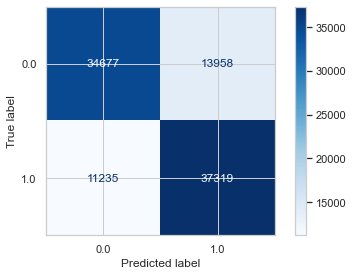

In [234]:
#from mlxtend.plotting import plot_confusion_matrix
cm = metrics.confusion_matrix(y_, y_predicted)
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df)
disp = plot_confusion_matrix(logModel_grid,x_,y_,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cm)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaled, y_train)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_, y_)))
mse1 =mean_squared_error(y_, y_predicted)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_, y_predicted))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_, y_predicted, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

## Training on the proposed combinatorial feature selection approach

**1. Training on the Top 3 selected data set from the proposed combinatorial feature selection  approach** 

In [235]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaledf1, y_trainf1)
end = timer()
y_predictedf3 = logModel_grid.predict(x_f1)
importancesf1 = pd.DataFrame(data={
    'Attribute': X_trainf1.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importancesf1 = importancesf1.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesf1, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()


Fitting 10 folds for each of 30 candidates, totalling 300 fits


                 Predicted Negative  Predicted Positive
Actual Negative               32534               16017
Actual Positive                2261                6557
Training duration: 35.841020100000605 seconds
--------------------------------------------------------------
True Positives: 6557
True Negatives: 32534
False Positives: 16017
False Negatives: 2261
--------------------------------------------------
Accuracy: 0.68
Mis-Classification: 0.32
Sensitivity: 0.74
Specificity: 0.67
Precision: 0.67
f_1 Score: 0.7
--------------------------------------------------------------
Training set score: 0.6783
Test set score: 0.6814
Mean Squared Error : 0.3186041241785633
Root Mean Squared Error : 0.5644502849486067
ROC AUC Score: 0.7068460672063658


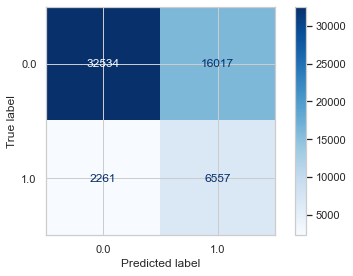

In [236]:
cmf3 = metrics.confusion_matrix(y_f1, y_predictedf3)
cm_dff3 = pd.DataFrame(cmf3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff3)
disp = plot_confusion_matrix(logModel_grid,x_f1,y_f1,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmf3)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaledf1, y_trainf1)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_f1, y_f1)))
mse1 =mean_squared_error(y_f1, y_predictedf3)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_f1, y_predictedf3))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_f1, y_predictedf3, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

**2. Training on the Top 5 selected data set from the proposed combinatorial feature  approach** 

In [237]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaledf2, y_trainf2)
end = timer()
y_predictedf5 = logModel_grid.predict(x_f2)
importancesf2 = pd.DataFrame(data={
    'Attribute': X_trainf2.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importancesf2 = importancesf2.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesf2, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


                 Predicted Negative  Predicted Positive
Actual Negative               34266               14285
Actual Positive                2398                6420
Training duration: 27.087477200002468 seconds
--------------------------------------------------------------
True Positives: 6420
True Negatives: 34266
False Positives: 14285
False Negatives: 2398
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.73
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.72
--------------------------------------------------------------
Training set score: 0.7070
Test set score: 0.7092
Mean Squared Error : 0.290801652460388
Root Mean Squared Error : 0.5392602826654194
ROC AUC Score: 0.7169147795609389


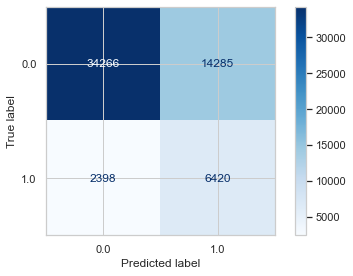

In [238]:
cmf5 = metrics.confusion_matrix(y_f2, y_predictedf5)
cm_dff5 = pd.DataFrame(cmf5, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff5)
disp = plot_confusion_matrix(logModel_grid,x_f2,y_f2,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmf5)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaledf2, y_trainf2)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_f2, y_f2)))
mse1 =mean_squared_error(y_f2, y_predictedf5)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_f2, y_predictedf5))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_f2, y_predictedf5, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

**3. Training on the Top 7 selected data set from the proposed combinatorial feature  approach** 

In [239]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaledf3, y_trainf3)
end = timer()
y_predictedf7 = logModel_grid.predict(x_f3)
importancesf3 = pd.DataFrame(data={
    'Attribute': X_trainf3.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importancesf3 = importancesf3.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesf3, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


                 Predicted Negative  Predicted Positive
Actual Negative               34735               13816
Actual Positive                2447                6371
Training duration: 34.335445299999265 seconds
--------------------------------------------------------------
True Positives: 6371
True Negatives: 34735
False Positives: 13816
False Negatives: 2447
--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity: 0.72
Specificity: 0.72
Precision: 0.72
f_1 Score: 0.72
--------------------------------------------------------------
Training set score: 0.7156
Test set score: 0.7165
Mean Squared Error : 0.28348062542488106
Root Mean Squared Error : 0.5324289862741144
ROC AUC Score: 0.7189663443648417


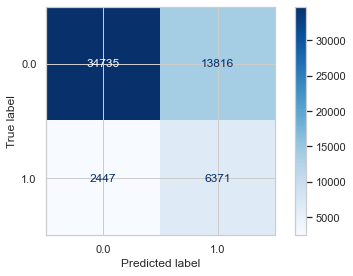

In [240]:
cmf7 = metrics.confusion_matrix(y_f3, y_predictedf7)
cm_dff7 = pd.DataFrame(cmf7, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff7)
disp = plot_confusion_matrix(logModel_grid,x_f3,y_f3,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmf7)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaledf3, y_trainf3)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_f3, y_f3)))
mse1 =mean_squared_error(y_f3, y_predictedf7)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_f3, y_predictedf7))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_f3, y_predictedf7, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

**4. Training on the Top 10 selected data set from the proposed combinatorial feature  approach** 

In [245]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaledf44, y_trainf44)
end = timer()
y_predictedf10 = logModel_grid.predict(x_f44)
importancesf44 = pd.DataFrame(data={
    'Attribute': X_trainf44.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importancesf44 = importancesf44.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesf44, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


                 Predicted Negative  Predicted Positive
Actual Negative               34673               13878
Actual Positive                2427                6391
Training duration: 37.04880649999541 seconds
--------------------------------------------------------------
True Positives: 6391
True Negatives: 34673
False Positives: 13878
False Negatives: 2427
--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity: 0.72
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.72
--------------------------------------------------------------
Training set score: 0.7138
Test set score: 0.7158
Mean Squared Error : 0.28421272812843174
Root Mean Squared Error : 0.5331160550278258
ROC AUC Score: 0.7194618845244274


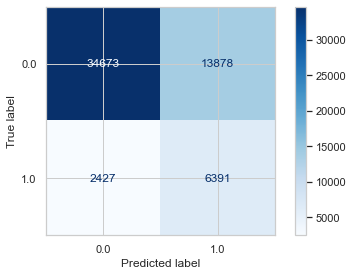

In [246]:
cmf10 = metrics.confusion_matrix(y_f44, y_predictedf10)
cm_dff10 = pd.DataFrame(cmf10, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff10)
disp = plot_confusion_matrix(logModel_grid,x_f44,y_f44,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmf10)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaledf44, y_trainf44)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_f44, y_f44)))
mse1 =mean_squared_error(y_f44, y_predictedf10)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_f44, y_predictedf10))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_f44, y_predictedf10, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

## Training on the Regularized Trees produced data set

**1. Training on the Top 3 selected data set**

In [252]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaledr1, y_trainr1)
end = timer()
y_predictedr1 = logModel_grid.predict(x_r1)
importancesr1 = pd.DataFrame(data={
    'Attribute': X_trainr1.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importancesr1 = importancesr1.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesr1, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


                 Predicted Negative  Predicted Positive
Actual Negative               32534               16017
Actual Positive                2261                6557
Training duration: 34.30682610000076 seconds
--------------------------------------------------------------
True Positives: 6557
True Negatives: 32534
False Positives: 16017
False Negatives: 2261
--------------------------------------------------
Accuracy: 0.68
Mis-Classification: 0.32
Sensitivity: 0.74
Specificity: 0.67
Precision: 0.67
f_1 Score: 0.7
--------------------------------------------------------------
Training set score: 0.6783
Test set score: 0.6814
Mean Squared Error : 0.3186041241785633
Root Mean Squared Error : 0.5644502849486067
ROC AUC Score: 0.7068460672063658


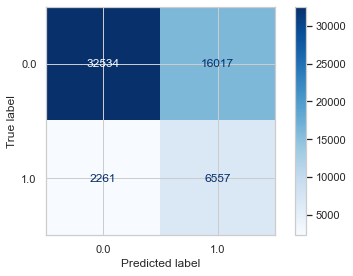

In [253]:
cmr1 = metrics.confusion_matrix(y_r1, y_predictedr1)
cm_dfr1 = pd.DataFrame(cmr1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr1)
disp = plot_confusion_matrix(logModel_grid,x_r1,y_r1,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmr1)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaledr1, y_trainr1)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_r1, y_r1)))
mse1 =mean_squared_error(y_r1, y_predictedr1)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_r1, y_predictedr1))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_r1, y_predictedr1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

**2. Training on the Top 5 selected data set**

In [255]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaledr2, y_trainr2)
end = timer()
y_predictedr2 = logModel_grid.predict(x_r2)
importancesr2 = pd.DataFrame(data={
    'Attribute': X_trainr2.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importancesr2 = importancesr2.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesr2, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


                 Predicted Negative  Predicted Positive
Actual Negative               34293               14258
Actual Positive                2224                6594
Training duration: 26.931278300005943 seconds
--------------------------------------------------------------
True Positives: 6594
True Negatives: 34293
False Positives: 14258
False Negatives: 2224
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.75
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.73
--------------------------------------------------------------
Training set score: 0.7113
Test set score: 0.7127
Mean Squared Error : 0.2872980180933954
Root Mean Squared Error : 0.5360018825465032
ROC AUC Score: 0.7270590204932783


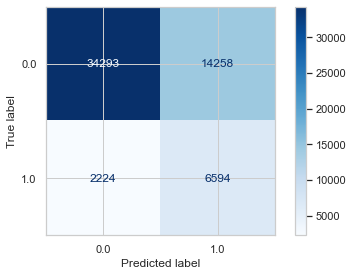

In [256]:
cmr2 = metrics.confusion_matrix(y_r2, y_predictedr2)
cm_dfr2 = pd.DataFrame(cmr2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr2)
disp = plot_confusion_matrix(logModel_grid,x_r2,y_r2,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmr2)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaledr2, y_trainr2)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_r2, y_r2)))
mse1 =mean_squared_error(y_r2, y_predictedr2)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_r2, y_predictedr2))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_r2, y_predictedr2, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

**3. Training on the Top 7 selected data set**

In [257]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaledr3, y_trainr3)
end = timer()
y_predictedr3 = logModel_grid.predict(x_r3)
importancesr3 = pd.DataFrame(data={
    'Attribute': X_trainr3.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importancesr3 = importancesr3.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesr3, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


                 Predicted Negative  Predicted Positive
Actual Negative               34427               14124
Actual Positive                2253                6565
Training duration: 30.904192399997555 seconds
--------------------------------------------------------------
True Positives: 6565
True Negatives: 34427
False Positives: 14124
False Negatives: 2253
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.74
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.73
--------------------------------------------------------------
Training set score: 0.7150
Test set score: 0.7145
Mean Squared Error : 0.2854677613345186
Root Mean Squared Error : 0.5342918316187499
ROC AUC Score: 0.7267946488651413


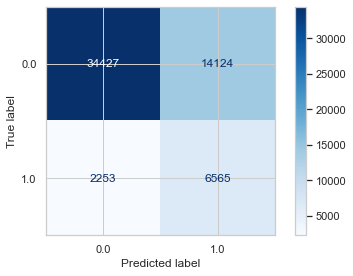

In [258]:
cmr3 = metrics.confusion_matrix(y_r3, y_predictedr3)
cm_dfr3 = pd.DataFrame(cmr3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr3)
disp = plot_confusion_matrix(logModel_grid,x_r3,y_r3,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmr3)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaledr3, y_trainr3)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_r3, y_r3)))
mse1 =mean_squared_error(y_r3, y_predictedr3)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_r3, y_predictedr3))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_r3, y_predictedr3, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

**4. Training on the Top 10 selected data set**

In [259]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
#GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

start = timer()
logModel_grid.fit(X_train_scaledr4, y_trainr4)
end = timer()
y_predictedr4 = logModel_grid.predict(x_r4)
importancesr4 = pd.DataFrame(data={
    'Attribute': X_trainr4.columns,
    'Importance': logModel_grid.best_estimator_.coef_[0]
})

importancesr4 = importancesr4.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesr4, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


                 Predicted Negative  Predicted Positive
Actual Negative               34508               14043
Actual Positive                2239                6579
Training duration: 34.58645180000167 seconds
--------------------------------------------------------------
True Positives: 6579
True Negatives: 34508
False Positives: 14043
False Negatives: 2239
--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity: 0.75
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.73
--------------------------------------------------------------
Training set score: 0.7166
Test set score: 0.7162
Mean Squared Error : 0.283811814743154
Root Mean Squared Error : 0.5327399128497451
ROC AUC Score: 0.728422654039116


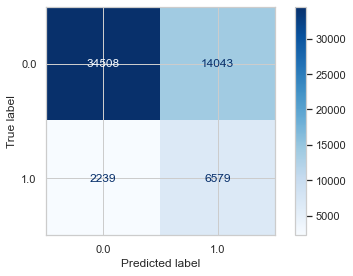

In [260]:
cmr4 = metrics.confusion_matrix(y_r4, y_predictedr4)
cm_dfr4 = pd.DataFrame(cmr4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr4)
disp = plot_confusion_matrix(logModel_grid,x_r4,y_r4,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("--------------------------------------------------------------")
confusion_metrics(cmr4)
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(logModel_grid.score(X_train_scaledr4, y_trainr4)))
print('Test set score: {:.4f}'.format(logModel_grid.score(x_r4, y_r4)))
mse1 =mean_squared_error(y_r4, y_predictedr4)
print('Mean Squared Error : '+ str(mse1))
rmse1 = math.sqrt(mean_squared_error(y_r4, y_predictedr4))
print('Root Mean Squared Error : '+ str(rmse1))
roc_auc_score1 = roc_auc_score(y_r4, y_predictedr4, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score1)

# Training data with Optimized Random Forest Classifier

## **Training on the unselected data set**

In [261]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaled, y_train)
end1 = timer()
y_predicted1 = model1.predict(x_)
importances2 = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model1.feature_importances_
})

importances2 = importances2.sort_values(by='Importance', ascending=False)

fig = px.bar(importances2, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               46400                2235
Actual Positive                6737               41817
Training duration: 33.1028604000021 seconds
----------------------------------------------
True Positives: 41817
True Negatives: 46400
False Positives: 2235
False Negatives: 6737
--------------------------------------------------
Accuracy: 0.91
Mis-Classification: 0.09
Sensitivity: 0.86
Specificity: 0.95
Precision: 0.95
f_1 Score: 0.91
--------------------------------------------------------------
Training set score: 0.9970
Test set score: 0.9077
Mean Squared Error : 0.09231497391680128
Root Mean Squared Error : 0.3038337932436109
ROC AUC Score: 0.9076463558029964


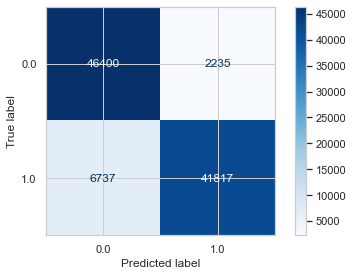

In [263]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_, y_predicted1)
cm_df1 = pd.DataFrame(cm1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df1)
disp = plot_confusion_matrix(model1,x_,y_,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cm1)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaled, y_train)))
print('Test set score: {:.4f}'.format(model1.score(x_, y_)))

mse2 =mean_squared_error(y_, y_predicted1)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_, y_predicted1))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_, y_predicted1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

## Training on the proposed combinatorial feature selection approach

**1. Training on the Top 3 selected data set from the proposed combinatorial feature selection  approach** 

In [264]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaledf1, y_trainf1)
end1 = timer()
y_predictedf1 = model1.predict(x_f1)
importancesf1 = pd.DataFrame(data={
    'Attribute': X_trainf1.columns,
    'Importance': model1.feature_importances_
})

importancesf1 = importancesf1.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesf1, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47806                 745
Actual Positive                8066                 752
Training duration: 2.4229143999982625 seconds
----------------------------------------------
True Positives: 752
True Negatives: 47806
False Positives: 745
False Negatives: 8066
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.09
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.16
--------------------------------------------------------------
Training set score: 0.8474
Test set score: 0.8464
Mean Squared Error : 0.15358468859488575
Root Mean Squared Error : 0.3918988244367234
ROC AUC Score: 0.5349677098892005


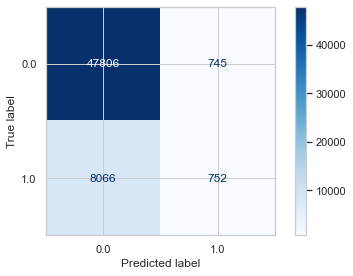

In [265]:
from sklearn.metrics import confusion_matrix
cmf1 = confusion_matrix(y_f1, y_predictedf1)
cm_dff1 = pd.DataFrame(cmf1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff1)
disp = plot_confusion_matrix(model1,x_f1,y_f1,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cmf1)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaledf1, y_trainf1)))
print('Test set score: {:.4f}'.format(model1.score(x_f1, y_f1)))

mse2 =mean_squared_error(y_f1, y_predictedf1)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_f1, y_predictedf1))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_f1, y_predictedf1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

**2. Training on the Top 5 selected data set from the proposed combinatorial feature selection  approach** 

In [266]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaledf2, y_trainf2)
end1 = timer()
y_predictedf2 = model1.predict(x_f2)
importancesf2 = pd.DataFrame(data={
    'Attribute': X_trainf2.columns,
    'Importance': model1.feature_importances_
})

importancesf2 = importancesf2.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesf2, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47718                 833
Actual Positive                7768                1050
Training duration: 4.911168299993733 seconds
----------------------------------------------
True Positives: 1050
True Negatives: 47718
False Positives: 833
False Negatives: 7768
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.12
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.21
--------------------------------------------------------------
Training set score: 0.8540
Test set score: 0.8501
Mean Squared Error : 0.14992417507713224
Root Mean Squared Error : 0.387200432692336
ROC AUC Score: 0.5509587019860039


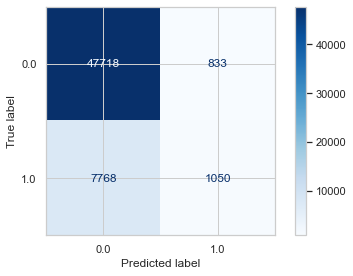

In [267]:
from sklearn.metrics import confusion_matrix
cmf2 = confusion_matrix(y_f2, y_predictedf2)
cm_dff2 = pd.DataFrame(cmf2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff2)
disp = plot_confusion_matrix(model1,x_f2,y_f2,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cmf2)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaledf2, y_trainf2)))
print('Test set score: {:.4f}'.format(model1.score(x_f2, y_f2)))

mse2 =mean_squared_error(y_f2, y_predictedf2)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_f2, y_predictedf2))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_f2, y_predictedf2, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

**3. Training on the Top 7 selected data set from the proposed combinatorial feature selection  approach** 

In [268]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaledf3, y_trainf3)
end1 = timer()
y_predictedf3 = model1.predict(x_f3)
importancesf3 = pd.DataFrame(data={
    'Attribute': X_trainf3.columns,
    'Importance': model1.feature_importances_
})

importancesf3 = importancesf3.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesf3, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47469                1082
Actual Positive                7621                1197
Training duration: 5.510705299995607 seconds
----------------------------------------------
True Positives: 1197
True Negatives: 47469
False Positives: 1082
False Negatives: 7621
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.14
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.24
--------------------------------------------------------------
Training set score: 0.8570
Test set score: 0.8483
Mean Squared Error : 0.15170213878575536
Root Mean Squared Error : 0.38948958751904444
ROC AUC Score: 0.5567296115783326


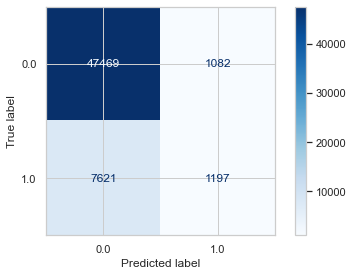

In [269]:
from sklearn.metrics import confusion_matrix
cmf3 = confusion_matrix(y_f3, y_predictedf3)
cm_dff3 = pd.DataFrame(cmf3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff3)
disp = plot_confusion_matrix(model1,x_f3,y_f3,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cmf3)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaledf3, y_trainf3)))
print('Test set score: {:.4f}'.format(model1.score(x_f3, y_f3)))

mse2 =mean_squared_error(y_f3, y_predictedf3)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_f3, y_predictedf3))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_f3, y_predictedf3, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

**4. Training on the Top 10 selected data set from the proposed combinatorial feature selection  approach** 

In [270]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaledf44, y_trainf44)
end1 = timer()
y_predictedf44 = model1.predict(x_f44)
importancesf44 = pd.DataFrame(data={
    'Attribute': X_trainf44.columns,
    'Importance': model1.feature_importances_
})

importancesf44 = importancesf44.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesf44, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               46979                1572
Actual Positive                7485                1333
Training duration: 7.75049870001385 seconds
----------------------------------------------
True Positives: 1333
True Negatives: 46979
False Positives: 1572
False Negatives: 7485
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.15
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.26
--------------------------------------------------------------
Training set score: 0.8675
Test set score: 0.8421
Mean Squared Error : 0.15787271871568268
Root Mean Squared Error : 0.39733200061873025
ROC AUC Score: 0.5593948707482512


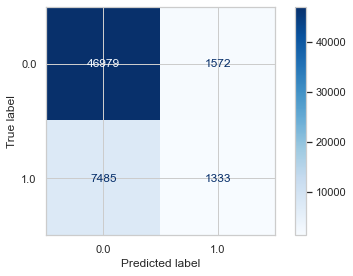

In [272]:
from sklearn.metrics import confusion_matrix
cmf44 = confusion_matrix(y_f44, y_predictedf44)
cm_dff44 = pd.DataFrame(cmf44, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dff44)
disp = plot_confusion_matrix(model1,x_f44,y_f44,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cmf44)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaledf44, y_trainf44)))
print('Test set score: {:.4f}'.format(model1.score(x_f44, y_f44)))

mse2 =mean_squared_error(y_f44, y_predictedf44)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_f44, y_predictedf44))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_f44, y_predictedf44, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

## Training on the Regularized Trees produced data set

**1. Training on the Top 3 selected data set**

In [273]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaledr1, y_trainr1)
end1 = timer()
y_predictedr1 = model1.predict(x_r1)
importancesr1 = pd.DataFrame(data={
    'Attribute': X_trainr1.columns,
    'Importance': model1.feature_importances_
})

importancesr1 = importancesr1.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesr1, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47806                 745
Actual Positive                8066                 752
Training duration: 2.4329830999922706 seconds
----------------------------------------------
True Positives: 752
True Negatives: 47806
False Positives: 745
False Negatives: 8066
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.09
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.16
--------------------------------------------------------------
Training set score: 0.8474
Test set score: 0.8464
Mean Squared Error : 0.15358468859488575
Root Mean Squared Error : 0.3918988244367234
ROC AUC Score: 0.5349677098892005


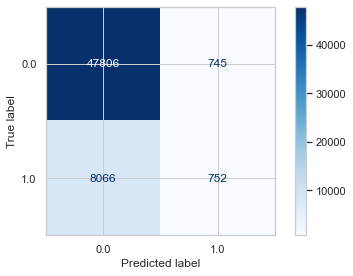

In [274]:
from sklearn.metrics import confusion_matrix
cmr1 = confusion_matrix(y_r1, y_predictedr1)
cm_dfr1 = pd.DataFrame(cmr1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr1)
disp = plot_confusion_matrix(model1,x_r1,y_r1,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cmr1)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaledr1, y_trainr1)))
print('Test set score: {:.4f}'.format(model1.score(x_r1, y_r1)))

mse2 =mean_squared_error(y_r1, y_predictedr1)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_r1, y_predictedr1))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_r1, y_predictedr1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

**2. Training on the Top 5 selected data set**

In [275]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaledr2, y_trainr2)
end1 = timer()
y_predictedr2 = model1.predict(x_r2)
importancesr2 = pd.DataFrame(data={
    'Attribute': X_trainr2.columns,
    'Importance': model1.feature_importances_
})

importancesr2 = importancesr2.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesr2, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47256                1295
Actual Positive                7522                1296
Training duration: 7.033003299991833 seconds
----------------------------------------------
True Positives: 1296
True Negatives: 47256
False Positives: 1295
False Negatives: 7522
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.15
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.26
--------------------------------------------------------------
Training set score: 0.8604
Test set score: 0.8463
Mean Squared Error : 0.15368927469539298
Root Mean Squared Error : 0.3920322368063537
ROC AUC Score: 0.5601495597344124


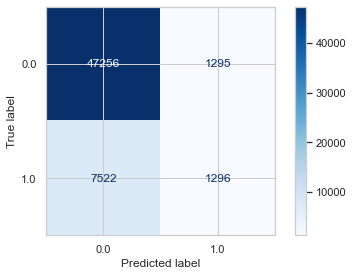

In [276]:
from sklearn.metrics import confusion_matrix
cmr2 = confusion_matrix(y_r2, y_predictedr2)
cm_dfr2 = pd.DataFrame(cmr2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr2)
disp = plot_confusion_matrix(model1,x_r2,y_r2,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cmr2)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaledr2, y_trainr2)))
print('Test set score: {:.4f}'.format(model1.score(x_r2, y_r2)))

mse2 =mean_squared_error(y_r2, y_predictedr2)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_r2, y_predictedr2))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_r2, y_predictedr2, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

**3. Training on the Top 7 selected data set**

In [277]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaledr3, y_trainr3)
end1 = timer()
y_predictedr3 = model1.predict(x_r3)
importancesr3 = pd.DataFrame(data={
    'Attribute': X_trainr3.columns,
    'Importance': model1.feature_importances_
})

importancesr3 = importancesr3.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesr3, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47256                1295
Actual Positive                7522                1296
Training duration: 7.74856649999856 seconds
----------------------------------------------
True Positives: 1296
True Negatives: 47256
False Positives: 1295
False Negatives: 7522
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.15
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.26
--------------------------------------------------------------
Training set score: 0.8724
Test set score: 0.8400
Mean Squared Error : 0.15998187174257875
Root Mean Squared Error : 0.3999773390363243
ROC AUC Score: 0.5721626912122894


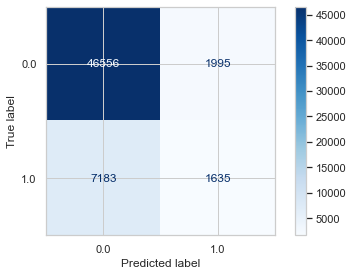

In [278]:
from sklearn.metrics import confusion_matrix
cmr3 = confusion_matrix(y_r3, y_predictedr2)
cm_dfr3 = pd.DataFrame(cmr3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr3)
disp = plot_confusion_matrix(model1,x_r3,y_r3,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cmr3)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaledr3, y_trainr3)))
print('Test set score: {:.4f}'.format(model1.score(x_r3, y_r3)))

mse2 =mean_squared_error(y_r3, y_predictedr3)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_r3, y_predictedr3))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_r3, y_predictedr3, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

**4. Training on the Top 10 selected data set**

In [279]:
model1 = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 100, max_features = 'sqrt')
start1 = timer()
model1.fit(X_train_scaledr4, y_trainr4)
end1 = timer()
y_predictedr4 = model1.predict(x_r4)
importancesr4 = pd.DataFrame(data={
    'Attribute': X_trainr4.columns,
    'Importance': model1.feature_importances_
})

importancesr4 = importancesr4.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesr4, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               34508               14043
Actual Positive                2239                6579
Training duration: 10.699952199996915 seconds
----------------------------------------------
True Positives: 1976
True Negatives: 45743
False Positives: 2808
False Negatives: 6842
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.22
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.36
--------------------------------------------------------------
Training set score: 0.9157
Test set score: 0.8318
Mean Squared Error : 0.16820931164914849
Root Mean Squared Error : 0.41013328522463094
ROC AUC Score: 0.5831255023472032


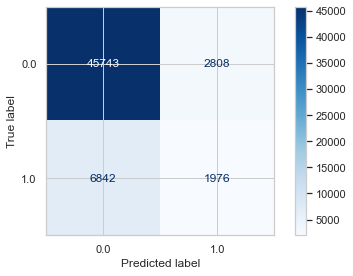

In [280]:
from sklearn.metrics import confusion_matrix
cmr4 = confusion_matrix(y_r4, y_predictedr4)
cm_dfr3 = pd.DataFrame(cmr4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfr4)
disp = plot_confusion_matrix(model1,x_r4,y_r4,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end1 - start1,"seconds")
print("----------------------------------------------")
confusion_metrics(cmr4)
print("--------------------------------------------------------------")

print('Training set score: {:.4f}'.format(model1.score(X_train_scaledr4, y_trainr4)))
print('Test set score: {:.4f}'.format(model1.score(x_r4, y_r4)))

mse2 =mean_squared_error(y_r4, y_predictedr4)
print('Mean Squared Error : '+ str(mse2))
rmse2 = math.sqrt(mean_squared_error(y_r4, y_predictedr4))
print('Root Mean Squared Error : '+ str(rmse2))
roc_auc_score2 = roc_auc_score(y_r4, y_predictedr4, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score2)

# Training data with Decision Tree Classifier

    -Simple to understand and to interpret. Trees can be visualized.

    -Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

    -The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

    -Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

    -Able to handle multi-output problems.

    -Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

    -Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

    -Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.
    
    
    ****Add elapsed times/accuracy and descrption

## Training the model on unselected original data

In [294]:

model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaled, y_train)
end2 = timer()
y_predicted2 = model2.predict(x_)
importances3 = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model2.feature_importances_
})

importances3 = importances3.sort_values(by='Importance', ascending=False)

fig = px.bar(importances3, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               41487                7148
Actual Positive                6398               42156
Training duration: 1.897602700002608 seconds
----------------------------------------------
True Positives: 42156
True Negatives: 41487
False Positives: 7148
False Negatives: 6398
--------------------------------------------------
Accuracy: 0.86
Mis-Classification: 0.14
Sensitivity: 0.87
Specificity: 0.85
Precision: 0.85
f_1 Score: 0.86
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.9970
Test set score: 0.8606
Mean Squared Error : 0.13937791313831813
Root Mean Squared Error : 0.3733335146197273
ROC AUC Score: 0.8606284215507121


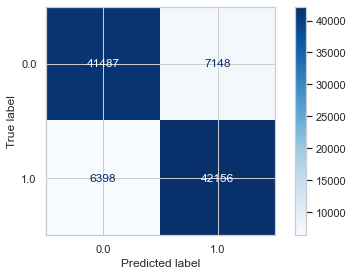

In [295]:
cm2 = metrics.confusion_matrix(y_, y_predicted2)
cm_df2 = pd.DataFrame(cm2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_df2)
disp = plot_confusion_matrix(model2,x_,y_,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cm2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaled, y_train)))
print('Test set score: {:.4f}'.format(model2.score(x_, y_)))

mse3 =mean_squared_error(y_, y_predicted2)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_, y_predicted2))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_, y_predicted2, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

## Training on the proposed combinatorial feature selection approach

**1. Training on the Top 3 selected data set from the proposed combinatorial feature selection  approach** 

In [282]:
model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaledf1, y_trainf1)
end2 = timer()
y_predictedd1 = model2.predict(x_f1)
importancesd1 = pd.DataFrame(data={
    'Attribute': X_trainf1.columns,
    'Importance': model2.feature_importances_
})

importancesd1 = importancesd1.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesd1, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47806                 745
Actual Positive                8066                 752
Training duration: 0.03707729998859577 seconds
----------------------------------------------
True Positives: 752
True Negatives: 47806
False Positives: 745
False Negatives: 8066
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.09
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.16
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8474
Test set score: 0.8464
Mean Squared Error : 0.15358468859488575
Root Mean Squared Error : 0.3918988244367234
ROC AUC Score: 0.5349677098892005


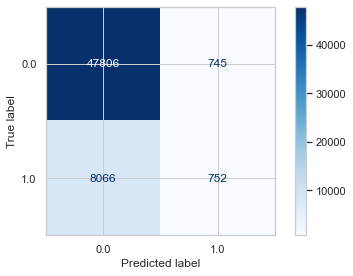

In [283]:
cmd1 = metrics.confusion_matrix(y_f1, y_predictedf1)
cm_dfd1 = pd.DataFrame(cmd1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfd1)
disp = plot_confusion_matrix(model2,x_f1,y_f1,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cmd1)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaledf1, y_trainf1)))
print('Test set score: {:.4f}'.format(model2.score(x_f1, y_f1)))

mse3 =mean_squared_error(y_f1, y_predictedf1)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_f1, y_predictedf1))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_f1, y_predictedf1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**2. Training on the Top 5 selected data set from the proposed combinatorial feature selection  approach** 

In [284]:
model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaledf2, y_trainf2)
end2 = timer()
y_predictedd2 = model2.predict(x_f2)
importancesd2 = pd.DataFrame(data={
    'Attribute': X_trainf2.columns,
    'Importance': model2.feature_importances_
})

importancesd2 = importancesd2.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesd2, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47718                 833
Actual Positive                7768                1050
Training duration: 0.09750560000247788 seconds
----------------------------------------------
True Positives: 1050
True Negatives: 47718
False Positives: 833
False Negatives: 7768
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.12
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.21
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8540
Test set score: 0.8501
Mean Squared Error : 0.14992417507713224
Root Mean Squared Error : 0.387200432692336
ROC AUC Score: 0.5509587019860039


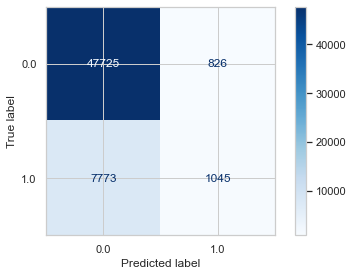

In [285]:
cmd2 = metrics.confusion_matrix(y_f2, y_predictedf2)
cm_dfd2 = pd.DataFrame(cmd2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfd2)
disp = plot_confusion_matrix(model2,x_f2,y_f2,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cmd2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaledf2, y_trainf2)))
print('Test set score: {:.4f}'.format(model2.score(x_f2, y_f2)))

mse3 =mean_squared_error(y_f2, y_predictedf2)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_f2, y_predictedf2))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_f2, y_predictedf2, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**3. Training on the Top 7 selected data set from the proposed combinatorial feature selection  approach** 

In [286]:
model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaledf3, y_trainf3)
end2 = timer()
y_predictedd3 = model2.predict(x_f3)
importancesd3 = pd.DataFrame(data={
    'Attribute': X_trainf3.columns,
    'Importance': model2.feature_importances_
})

importancesd3 = importancesd3.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesd3, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47469                1082
Actual Positive                7621                1197
Training duration: 0.14725190000899602 seconds
----------------------------------------------
True Positives: 1197
True Negatives: 47469
False Positives: 1082
False Negatives: 7621
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.14
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.24
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8570
Test set score: 0.8488
Mean Squared Error : 0.15170213878575536
Root Mean Squared Error : 0.38948958751904444
ROC AUC Score: 0.5567296115783326


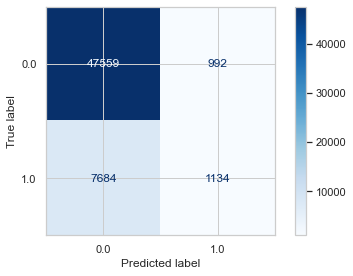

In [287]:
cmd3 = metrics.confusion_matrix(y_f3, y_predictedf3)
cm_dfd3 = pd.DataFrame(cmd3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfd3)
disp = plot_confusion_matrix(model2,x_f3,y_f3,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cmd3)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaledf3, y_trainf3)))
print('Test set score: {:.4f}'.format(model2.score(x_f3, y_f3)))

mse3 =mean_squared_error(y_f3, y_predictedf3)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_f3, y_predictedf3))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_f3, y_predictedf3, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**4. Training on the Top 10 selected data set from the proposed combinatorial feature selection  approach** 

In [289]:
model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaledf44, y_trainf44)
end2 = timer()
y_predictedd44 = model2.predict(x_f44)
importancesd44 = pd.DataFrame(data={
    'Attribute': X_trainf44.columns,
    'Importance': model2.feature_importances_
})

importancesd44 = importancesd44.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesd44, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               46979                1572
Actual Positive                7485                1333
Training duration: 0.2518439999985276 seconds
----------------------------------------------
True Positives: 1333
True Negatives: 46979
False Positives: 1572
False Negatives: 7485
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.15
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.26
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8675
Test set score: 0.8426
Mean Squared Error : 0.15787271871568268
Root Mean Squared Error : 0.39733200061873025
ROC AUC Score: 0.5593948707482512


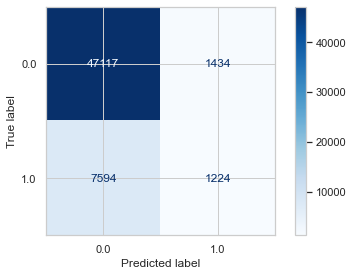

In [291]:
cmd44 = metrics.confusion_matrix(y_f44, y_predictedf44)
cm_dfd44 = pd.DataFrame(cmd44, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfd44)
disp = plot_confusion_matrix(model2,x_f44,y_f44,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cmd44)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaledf44, y_trainf44)))
print('Test set score: {:.4f}'.format(model2.score(x_f44, y_f44)))

mse3 =mean_squared_error(y_f44, y_predictedf44)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_f44, y_predictedf44))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_f44, y_predictedf44, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

## Training on the Regularized Trees produced data set

**1. Training on the Top 3 selected data set**

In [318]:
model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaledr1, y_trainr1)
end2 = timer()
y_predicteddr1 = model2.predict(x_r1)
importancesdr1 = pd.DataFrame(data={
    'Attribute': X_trainr1.columns,
    'Importance': model2.feature_importances_
})

importancesdr1 = importancesdr1.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesdr1, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47806                 745
Actual Positive                8066                 752
Training duration: 0.037695599981816486 seconds
----------------------------------------------
True Positives: 752
True Negatives: 47806
False Positives: 745
False Negatives: 8066
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.09
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.16
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8474
Test set score: 0.8464
Mean Squared Error : 0.15358468859488575
Root Mean Squared Error : 0.3918988244367234
ROC AUC Score: 0.5349677098892005


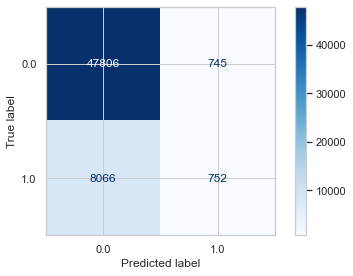

In [319]:
cmdr1 = metrics.confusion_matrix(y_r1, y_predictedr1)
cm_dfdr1 = pd.DataFrame(cmdr1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfdr1)
disp = plot_confusion_matrix(model2,x_r1,y_r1,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cmdr1)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaledr1, y_trainr1)))
print('Test set score: {:.4f}'.format(model2.score(x_r1, y_r1)))

mse3 =mean_squared_error(y_r1, y_predictedr1)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_r1, y_predictedr1))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_r1, y_predictedr1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**2. Training on the Top 5 selected data set**

In [320]:
model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaledr2, y_trainr2)
end2 = timer()
y_predicteddr2 = model2.predict(x_r2)
importancesdr2 = pd.DataFrame(data={
    'Attribute': X_trainr2.columns,
    'Importance': model2.feature_importances_
})

importancesdr2 = importancesdr2.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesdr2, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               47256                1295
Actual Positive                7522                1296
Training duration: 0.1607120999833569 seconds
----------------------------------------------
True Positives: 1296
True Negatives: 47256
False Positives: 1295
False Negatives: 7522
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.15
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.26
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8604
Test set score: 0.8474
Mean Squared Error : 0.15368927469539298
Root Mean Squared Error : 0.3920322368063537
ROC AUC Score: 0.5601495597344124


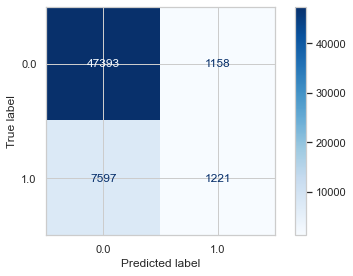

In [321]:
cmdr2 = metrics.confusion_matrix(y_r2, y_predictedr2)
cm_dfdr2 = pd.DataFrame(cmdr2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfdr2)
disp = plot_confusion_matrix(model2,x_r2,y_r2,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cmdr2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaledr2, y_trainr2)))
print('Test set score: {:.4f}'.format(model2.score(x_r2, y_r2)))

mse3 =mean_squared_error(y_r2, y_predictedr2)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_r2, y_predictedr2))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_r2, y_predictedr2, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**3. Training on the Top 7 selected data set**

In [322]:
model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaledr3, y_trainr3)
end2 = timer()
y_predicteddr3 = model2.predict(x_r3)
importancesdr3 = pd.DataFrame(data={
    'Attribute': X_trainr3.columns,
    'Importance': model2.feature_importances_
})

importancesdr3 = importancesdr3.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesdr3, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               46556                1995
Actual Positive                7183                1635
Training duration: 0.25095709998277016 seconds
----------------------------------------------
True Positives: 1635
True Negatives: 46556
False Positives: 1995
False Negatives: 7183
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.19
Specificity: 0.96
Precision: 0.96
f_1 Score: 0.31
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8724
Test set score: 0.8405
Mean Squared Error : 0.15998187174257875
Root Mean Squared Error : 0.3999773390363243
ROC AUC Score: 0.5721626912122894


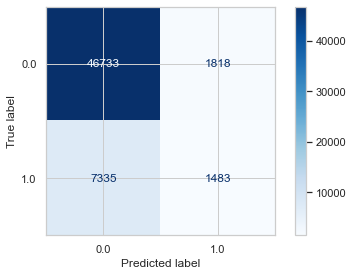

In [323]:
cmdr3 = metrics.confusion_matrix(y_r3, y_predictedr3)
cm_dfdr3 = pd.DataFrame(cmdr3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfdr3)
disp = plot_confusion_matrix(model2,x_r3,y_r3,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cmdr3)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaledr3, y_trainr3)))
print('Test set score: {:.4f}'.format(model2.score(x_r3, y_r3)))

mse3 =mean_squared_error(y_r3, y_predictedr3)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_r3, y_predictedr3))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_r3, y_predictedr3, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**4. Training on the Top 10 selected data set**

In [324]:
model2 = DecisionTreeClassifier()
start2 = timer()
model2.fit(X_train_scaledr4, y_trainr4)
end2 = timer()
y_predicteddr4 = model2.predict(x_r4)
importancesdr4 = pd.DataFrame(data={
    'Attribute': X_trainr4.columns,
    'Importance': model2.feature_importances_
})

importancesdr4 = importancesdr4.sort_values(by='Importance', ascending=False)

fig = px.bar(importancesdr4, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text="Feature importances obtained from coefficients")
fig.show()

                 Predicted Negative  Predicted Positive
Actual Negative               45743                2808
Actual Positive                6842                1976
Training duration: 0.3419735000061337 seconds
----------------------------------------------
True Positives: 1976
True Negatives: 45743
False Positives: 2808
False Negatives: 6842
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.22
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.36
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.9157
Test set score: 0.8192
Mean Squared Error : 0.16820931164914849
Root Mean Squared Error : 0.41013328522463094
ROC AUC Score: 0.5831255023472032


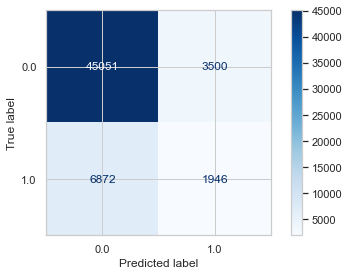

In [325]:
cmdr4 = metrics.confusion_matrix(y_r4, y_predictedr4)
cm_dfdr4 = pd.DataFrame(cmdr4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfdr4)
disp = plot_confusion_matrix(model2,x_r4,y_r4,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end2 - start2,"seconds")
print("----------------------------------------------")
confusion_metrics(cmdr4)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(model2.score(X_train_scaledr4, y_trainr4)))
print('Test set score: {:.4f}'.format(model2.score(x_r4, y_r4)))

mse3 =mean_squared_error(y_r4, y_predictedr4)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_r4, y_predictedr4))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_r4, y_predictedr4, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

# Training data with Gaussian Naive Bayes classifier 

## Training the model on unselected original data

In [305]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaled, y_train)
end = timer()
y_predictedg = gnb.predict(x_)

                 Predicted Negative  Predicted Positive
Actual Negative               30215               18420
Actual Positive                8994               39560
Training duration: 0.10331679999944754 seconds
----------------------------------------------
True Positives: 39560
True Negatives: 30215
False Positives: 18420
False Negatives: 8994
--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity: 0.81
Specificity: 0.62
Precision: 0.62
f_1 Score: 0.7
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.7197
Test set score: 0.7179
Mean Squared Error : 0.2820689584212205
Root Mean Squared Error : 0.5311016460351262
ROC AUC Score: 0.7180116767604853


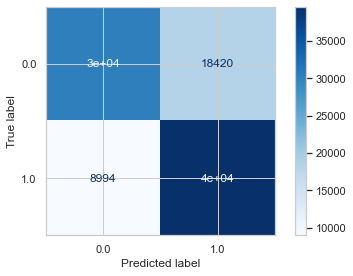

In [306]:
cmg = metrics.confusion_matrix(y_, y_predictedg)
cm_dfg = pd.DataFrame(cmg, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfg)
disp = plot_confusion_matrix(gnb,x_,y_,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmg)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaled, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(x_, y_)))

mse3 =mean_squared_error(y_, y_predictedg)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_, y_predictedg))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_, y_predictedg, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

## Training on the data set produced from the proposed combinatorial feature selection approach

**1. Training on the Top 3 selected data set from the proposed combinatorial feature selection  approach** 

In [308]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaledf1, y_trainf1)
end = timer()
y_predictedgf1 = gnb.predict(x_f1)

                 Predicted Negative  Predicted Positive
Actual Negative               45847                2704
Actual Positive                6678                2140
Training duration: 0.019933100003981963 seconds
----------------------------------------------
True Positives: 2140
True Negatives: 45847
False Positives: 2704
False Negatives: 6678
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.24
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.39
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8393
Test set score: 0.8365
Mean Squared Error : 0.163537799159825
Root Mean Squared Error : 0.40439807017322055
ROC AUC Score: 0.593495701856214


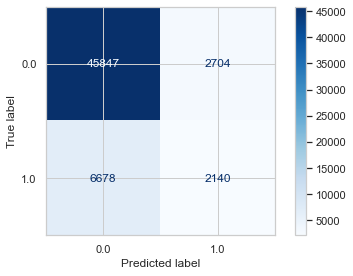

In [310]:
cmgf1 = metrics.confusion_matrix(y_f1, y_predictedgf1)
cm_dfgf1 = pd.DataFrame(cmgf1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfgf1)
disp = plot_confusion_matrix(gnb,x_f1,y_f1,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmgf1)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaledf1, y_trainf1)))
print('Test set score: {:.4f}'.format(gnb.score(x_f1, y_f1)))

mse3 =mean_squared_error(y_f1, y_predictedgf1)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_f1, y_predictedgf1))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_f1, y_predictedgf1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**2. Training on the Top 5 selected data set from the proposed combinatorial feature selection  approach** 

In [311]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaledf2, y_trainf2)
end = timer()
y_predictedgf2 = gnb.predict(x_f2)

                 Predicted Negative  Predicted Positive
Actual Negative               39762                8789
Actual Positive                3828                4990
Training duration: 0.030174900020938367 seconds
----------------------------------------------
True Positives: 4990
True Negatives: 39762
False Positives: 8789
False Negatives: 3828
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.57
Specificity: 0.82
Precision: 0.82
f_1 Score: 0.67
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.7802
Test set score: 0.7801
Mean Squared Error : 0.21992713834997996
Root Mean Squared Error : 0.46896389877044903
ROC AUC Score: 0.6924309094945063


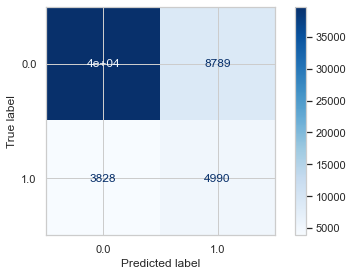

In [312]:
cmgf2 = metrics.confusion_matrix(y_f2, y_predictedgf2)
cm_dfgf2 = pd.DataFrame(cmgf2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfgf2)
disp = plot_confusion_matrix(gnb,x_f2,y_f2,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmgf2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaledf2, y_trainf2)))
print('Test set score: {:.4f}'.format(gnb.score(x_f2, y_f2)))

mse3 =mean_squared_error(y_f2, y_predictedgf2)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_f2, y_predictedgf2))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_f2, y_predictedgf2, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**3. Training on the Top 7 selected data set from the proposed combinatorial feature selection  approach** 

In [314]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaledf3, y_trainf3)
end = timer()
y_predictedgf3 = gnb.predict(x_f3)

                 Predicted Negative  Predicted Positive
Actual Negative               41322                7229
Actual Positive                4775                4043
Training duration: 0.03840900000068359 seconds
----------------------------------------------
True Positives: 4043
True Negatives: 41322
False Positives: 7229
False Negatives: 4775
--------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.46
Specificity: 0.85
Precision: 0.85
f_1 Score: 0.6
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.7928
Test set score: 0.7908
Mean Squared Error : 0.20924192508149
Root Mean Squared Error : 0.45742969414052037
ROC AUC Score: 0.6547995065751218


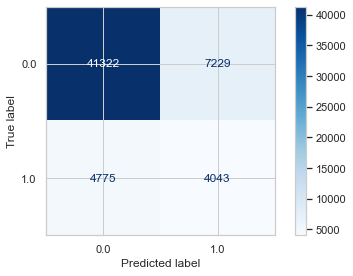

In [315]:
cmgf3 = metrics.confusion_matrix(y_f3, y_predictedgf3)
cm_dfgf3 = pd.DataFrame(cmgf3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfgf3)
disp = plot_confusion_matrix(gnb,x_f3,y_f3,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmgf3)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaledf3, y_trainf3)))
print('Test set score: {:.4f}'.format(gnb.score(x_f3, y_f3)))

mse3 =mean_squared_error(y_f3, y_predictedgf3)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_f3, y_predictedgf3))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_f3, y_predictedgf3, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**4. Training on the Top 10 selected data set from the proposed combinatorial feature selection  approach** 

In [316]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaledf44, y_trainf44)
end = timer()
y_predictedgf44 = gnb.predict(x_f44)

                 Predicted Negative  Predicted Positive
Actual Negative               40923                7628
Actual Positive                4627                4191
Training duration: 0.044247200014069676 seconds
----------------------------------------------
True Positives: 4191
True Negatives: 40923
False Positives: 7628
False Negatives: 4627
--------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.48
Specificity: 0.84
Precision: 0.84
f_1 Score: 0.61
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.7871
Test set score: 0.7864
Mean Squared Error : 0.213617110286043
Root Mean Squared Error : 0.46218731082326675
ROC AUC Score: 0.6590823510094599


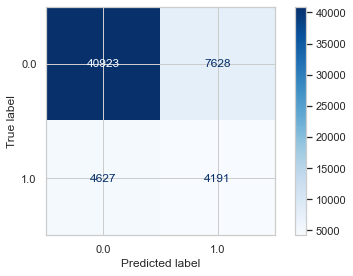

In [317]:
cmgf44 = metrics.confusion_matrix(y_f44, y_predictedgf44)
cm_dfgf44 = pd.DataFrame(cmgf44, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfgf44)
disp = plot_confusion_matrix(gnb,x_f44,y_f44,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmgf44)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaledf44, y_trainf44)))
print('Test set score: {:.4f}'.format(gnb.score(x_f44, y_f44)))

mse3 =mean_squared_error(y_f44, y_predictedgf44)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_f44, y_predictedgf44))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_f44, y_predictedgf44, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

## Training on the Regularized Trees produced data set

**1. Training on the Top 3 selected data set**

In [326]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaledr1, y_trainr1)
end = timer()
y_predictedgr1 = gnb.predict(x_r1)

                 Predicted Negative  Predicted Positive
Actual Negative               45847                2704
Actual Positive                6678                2140
Training duration: 0.02021050002076663 seconds
----------------------------------------------
True Positives: 2140
True Negatives: 45847
False Positives: 2704
False Negatives: 6678
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.24
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.39
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8393
Test set score: 0.8365
Mean Squared Error : 0.163537799159825
Root Mean Squared Error : 0.40439807017322055
ROC AUC Score: 0.593495701856214


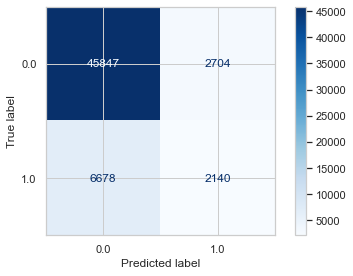

In [327]:
cmgr1 = metrics.confusion_matrix(y_r1, y_predictedgr1)
cm_dfgr1 = pd.DataFrame(cmgr1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfgr1)
disp = plot_confusion_matrix(gnb,x_r1,y_r1,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmgr1)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaledr1, y_trainr1)))
print('Test set score: {:.4f}'.format(gnb.score(x_r1, y_r1)))

mse3 =mean_squared_error(y_r1, y_predictedgr1)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_r1, y_predictedgr1))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_r1, y_predictedgr1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**2. Training on the Top 5 selected data set**

In [329]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaledr2, y_trainr2)
end = timer()
y_predictedgr2 = gnb.predict(x_r2)

                 Predicted Negative  Predicted Positive
Actual Negative               44151                4400
Actual Positive                5418                3400
Training duration: 0.02345519998925738 seconds
----------------------------------------------
True Positives: 3400
True Negatives: 44151
False Positives: 4400
False Negatives: 5418
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.39
Specificity: 0.91
Precision: 0.91
f_1 Score: 0.54
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8292
Test set score: 0.8289
Mean Squared Error : 0.1711377224633513
Root Mean Squared Error : 0.41368795300727734
ROC AUC Score: 0.6474743043185108


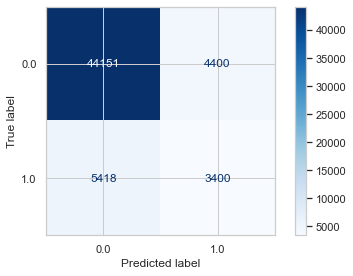

In [330]:
cmgr2 = metrics.confusion_matrix(y_r2, y_predictedgr2)
cm_dfgr2 = pd.DataFrame(cmgr2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfgr2)
disp = plot_confusion_matrix(gnb,x_r2,y_r2,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmgr2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaledr2, y_trainr2)))
print('Test set score: {:.4f}'.format(gnb.score(x_r2, y_r2)))

mse3 =mean_squared_error(y_r2, y_predictedgr2)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_r2, y_predictedgr2))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_r2, y_predictedgr2, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**3. Training on the Top 7 selected data set**

In [331]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaledr3, y_trainr3)
end = timer()
y_predictedgr3 = gnb.predict(x_r3)

                 Predicted Negative  Predicted Positive
Actual Negative               43068                5483
Actual Positive                5367                3451
Training duration: 0.028756999992765486 seconds
----------------------------------------------
True Positives: 3451
True Negatives: 43068
False Positives: 5483
False Negatives: 5367
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.39
Specificity: 0.89
Precision: 0.89
f_1 Score: 0.54
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.8134
Test set score: 0.8109
Mean Squared Error : 0.18912653175059702
Root Mean Squared Error : 0.43488680337600155
ROC AUC Score: 0.6392128961958053


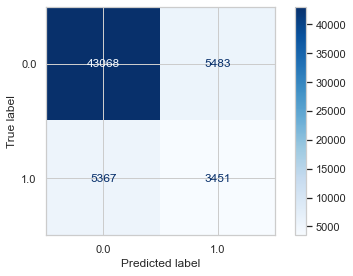

In [332]:
cmgr3 = metrics.confusion_matrix(y_r3, y_predictedgr3)
cm_dfgr3 = pd.DataFrame(cmgr3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfgr3)
disp = plot_confusion_matrix(gnb,x_r3,y_r3,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmgr3)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaledr3, y_trainr3)))
print('Test set score: {:.4f}'.format(gnb.score(x_r3, y_r3)))

mse3 =mean_squared_error(y_r3, y_predictedgr3)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_r3, y_predictedgr3))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_r3, y_predictedgr3, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)

**4. Training on the Top 10 selected data set**

In [333]:
gnb = GaussianNB()
start = timer()
gnb.fit(X_train_scaledr4, y_trainr4)
end = timer()
y_predictedgr4 = gnb.predict(x_r4)

                 Predicted Negative  Predicted Positive
Actual Negative               41577                6974
Actual Positive                4690                4128
Training duration: 0.03601959999650717 seconds
----------------------------------------------
True Positives: 4128
True Negatives: 41577
False Positives: 6974
False Negatives: 4690
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.47
Specificity: 0.86
Precision: 0.86
f_1 Score: 0.61
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Training set score: 0.7988
Test set score: 0.7967
Mean Squared Error : 0.2033153793860796
Root Mean Squared Error : 0.45090506693325105
ROC AUC Score: 0.6622452980876384


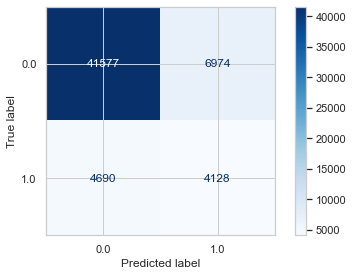

In [334]:
cmgr4 = metrics.confusion_matrix(y_r4, y_predictedgr4)
cm_dfgr4 = pd.DataFrame(cmgr4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
#Showing the confusion matrix
print(cm_dfgr4)
disp = plot_confusion_matrix(gnb,x_r4,y_r4,cmap="Blues")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Training duration:',end - start,"seconds")
print("----------------------------------------------")
confusion_metrics(cmgr4)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaledr4, y_trainr4)))
print('Test set score: {:.4f}'.format(gnb.score(x_r4, y_r4)))

mse3 =mean_squared_error(y_r4, y_predictedgr4)
print('Mean Squared Error : '+ str(mse3))
rmse3 = math.sqrt(mean_squared_error(y_r4, y_predictedgr4))
print('Root Mean Squared Error : '+ str(rmse3))
roc_auc_score3 = roc_auc_score(y_r4, y_predictedgr4, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score3)